In [16]:
import pandas as pd
from HelperFunctions.model_performance import *
from HelperFunctions.feature_visualizations import *
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

----------------------

# Change in Test Statistics Across 100 Iterations of Test Harness runs with Random Forest Classifier

----------------------

**TODO**: 
- explain the Test Harness
- explain why we want to look at TP and FP rates

In [2]:
#load leaderboard
leaderboard = pd.read_html('./data/cross_val_tptn_classification_leaderboard.html')[0]

#get names of rosetta runs
rosetta_runs = leaderboard[leaderboard['Data and Split Description']=='R']
rosetta_runs_names = list(rosetta_runs['Run ID'].values)

#get names of R+S runs
entropy_rosetta_runs = leaderboard[leaderboard['Data and Split Description']=='RS']
entropy_rosetta_runs_names = list(entropy_rosetta_runs['Run ID'].values)

### Rosetta Model TPTN data extraction

In [3]:
# "R" Model

#initialize dataframe that will contain data
ros_df = pd.DataFrame()
ros_df['TP Count'] = []
ros_df['FP Count'] = []
ros_df['TN Count'] = []
ros_df['FN Count'] = []

#initialize empty lists for data
ros_tp_data = []
ros_tn_data = []
ros_fp_data = []
ros_fn_data = []

#loop through files
for run_name in rosetta_runs_names:
    df = pd.read_csv('./test_harness_runs/tptn_runs/run_%s/testing_data.csv'%run_name)
    tp,tn,fp,fn = get_tptn_data(df)

    #update the lists
    ros_tp_data.append(tp)
    ros_tn_data.append(tn)
    ros_fp_data.append(fp)
    ros_fn_data.append(fn)

#construct final dataframe
ros_df['TP Count'] = ros_tp_data
ros_df['FP Count'] = ros_fp_data
ros_df['FN Count'] = ros_fn_data
ros_df['TN Count'] = ros_tn_data

In [4]:
ros_df.describe()

,TP Count,FP Count,TN Count,FN Count
count,100.000000,100.000000,100.000000,100.000000
mean,1586.390000,1306.610000,12427.390000,731.610000
std,5.132379,8.461314,8.461314,5.132379
min,1575.000000,1288.000000,12406.000000,717.000000
25%,1583.000000,1300.000000,12422.000000,728.000000
50%,1587.000000,1306.000000,12428.000000,731.000000
75%,1590.000000,1312.000000,12434.000000,735.000000
max,1601.000000,1328.000000,12446.000000,743.000000


### Rosetta+Entropy Model TPTN data extraction

In [5]:
# "R+S" Model

#initialize dataframe that will contain data
spc_df = pd.DataFrame()
spc_df['TP Count'] = []
spc_df['FP Count'] = []
spc_df['TN Count'] = []
spc_df['FN Count'] = []

#initialize empty lists for data
spc_tp_data = []
spc_tn_data = []
spc_fp_data = []
spc_fn_data = []

#loop through files
for run_name in entropy_rosetta_runs_names:
    df = pd.read_csv('./test_harness_runs/tptn_runs/run_%s/testing_data.csv'%run_name)
    tp,tn,fp,fn = get_tptn_data(df)

    #update the lists
    spc_tp_data.append(tp)
    spc_tn_data.append(tn)
    spc_fp_data.append(fp)
    spc_fn_data.append(fn)

#construct final dataframe
spc_df['TP Count'] = spc_tp_data
spc_df['FP Count'] = spc_fp_data
spc_df['FN Count'] = spc_fn_data
spc_df['TN Count'] = spc_tn_data

In [6]:
spc_df.describe()

,TP Count,FP Count,TN Count,FN Count
count,100.00000,100.000000,100.000000,100.00000
mean,1565.84000,1261.640000,12472.360000,752.16000
std,6.30331,9.053734,9.053734,6.30331
min,1551.00000,1235.000000,12453.000000,735.00000
25%,1562.00000,1255.500000,12466.750000,748.00000
50%,1565.00000,1262.000000,12472.000000,753.00000
75%,1570.00000,1267.250000,12478.500000,756.00000
max,1583.00000,1281.000000,12499.000000,767.00000


In [7]:
results = spc_df.describe() - ros_df.describe()
results.iloc[1,:]

TP Count   -20.55
FP Count   -44.97
TN Count    44.97
FN Count    20.55
Name: mean, dtype: float64

In [8]:
data = pd.read_csv('./data/df_aggregated_spc.csv')
spc_features = pd.read_csv('./data/entropy_features.csv').iloc[:,0].values.tolist()
ros_features = pd.read_csv('./data/rosetta_features.csv').iloc[:,0].values.tolist()

----------------------------

# Leave One Out Runs
**TODO**:
- explain what a leave one out run is
- highlight results from the graphs/data

--------------------------

### Classifier Results

#### N.B.: must have matplotlib v. 3.0.3

Printing number of instances per group:
['Rocklin', 'HEEH']                 17
['Longxing', 'HEEH']                17
['Longxing', 'EHEE']                17
['Rocklin', 'HHH']                  17
['Rocklin', 'EEHEE']                17
['Rocklin', 'EHEE']                 17
['Longxing', 'EEHEE']               17
['181114_Benjamin_NTF2', 'NTF2']    16
['Eva1', 'Eva2', 'beta_grasp']      10
['Eva1', 'Eva2', 'fold4']           10
['Eva1', 'Eva2', 'thio']            10
['Eva1', 'Eva2', 'fold2']           10
['Eva1', 'Eva2', 'ferredoxin']      10
['Eva1', 'Eva2', 'coil']            10
['Eva1', 'Eva2', '4h']              10
['Inna', 'Eva1', 'Eva2', 'HHH']      9
['Eva2', 'Eva1', '4h']               7
['Eva2', 'Eva1', 'coil']             7
['Eva2', 'Eva1', 'thio']             7
['Eva2', 'Eva1', 'ferredoxin']       7
['Eva2', 'Eva1', 'beta_grasp']       7
['Eva2', 'Eva1', 'fold2']            7
['Eva2', 'Eva1', 'fold4']            7
['Eva2', 'Eva1', 'Inna', 'HHH']      5
['Eva2', 'Inna', 'Eva1',

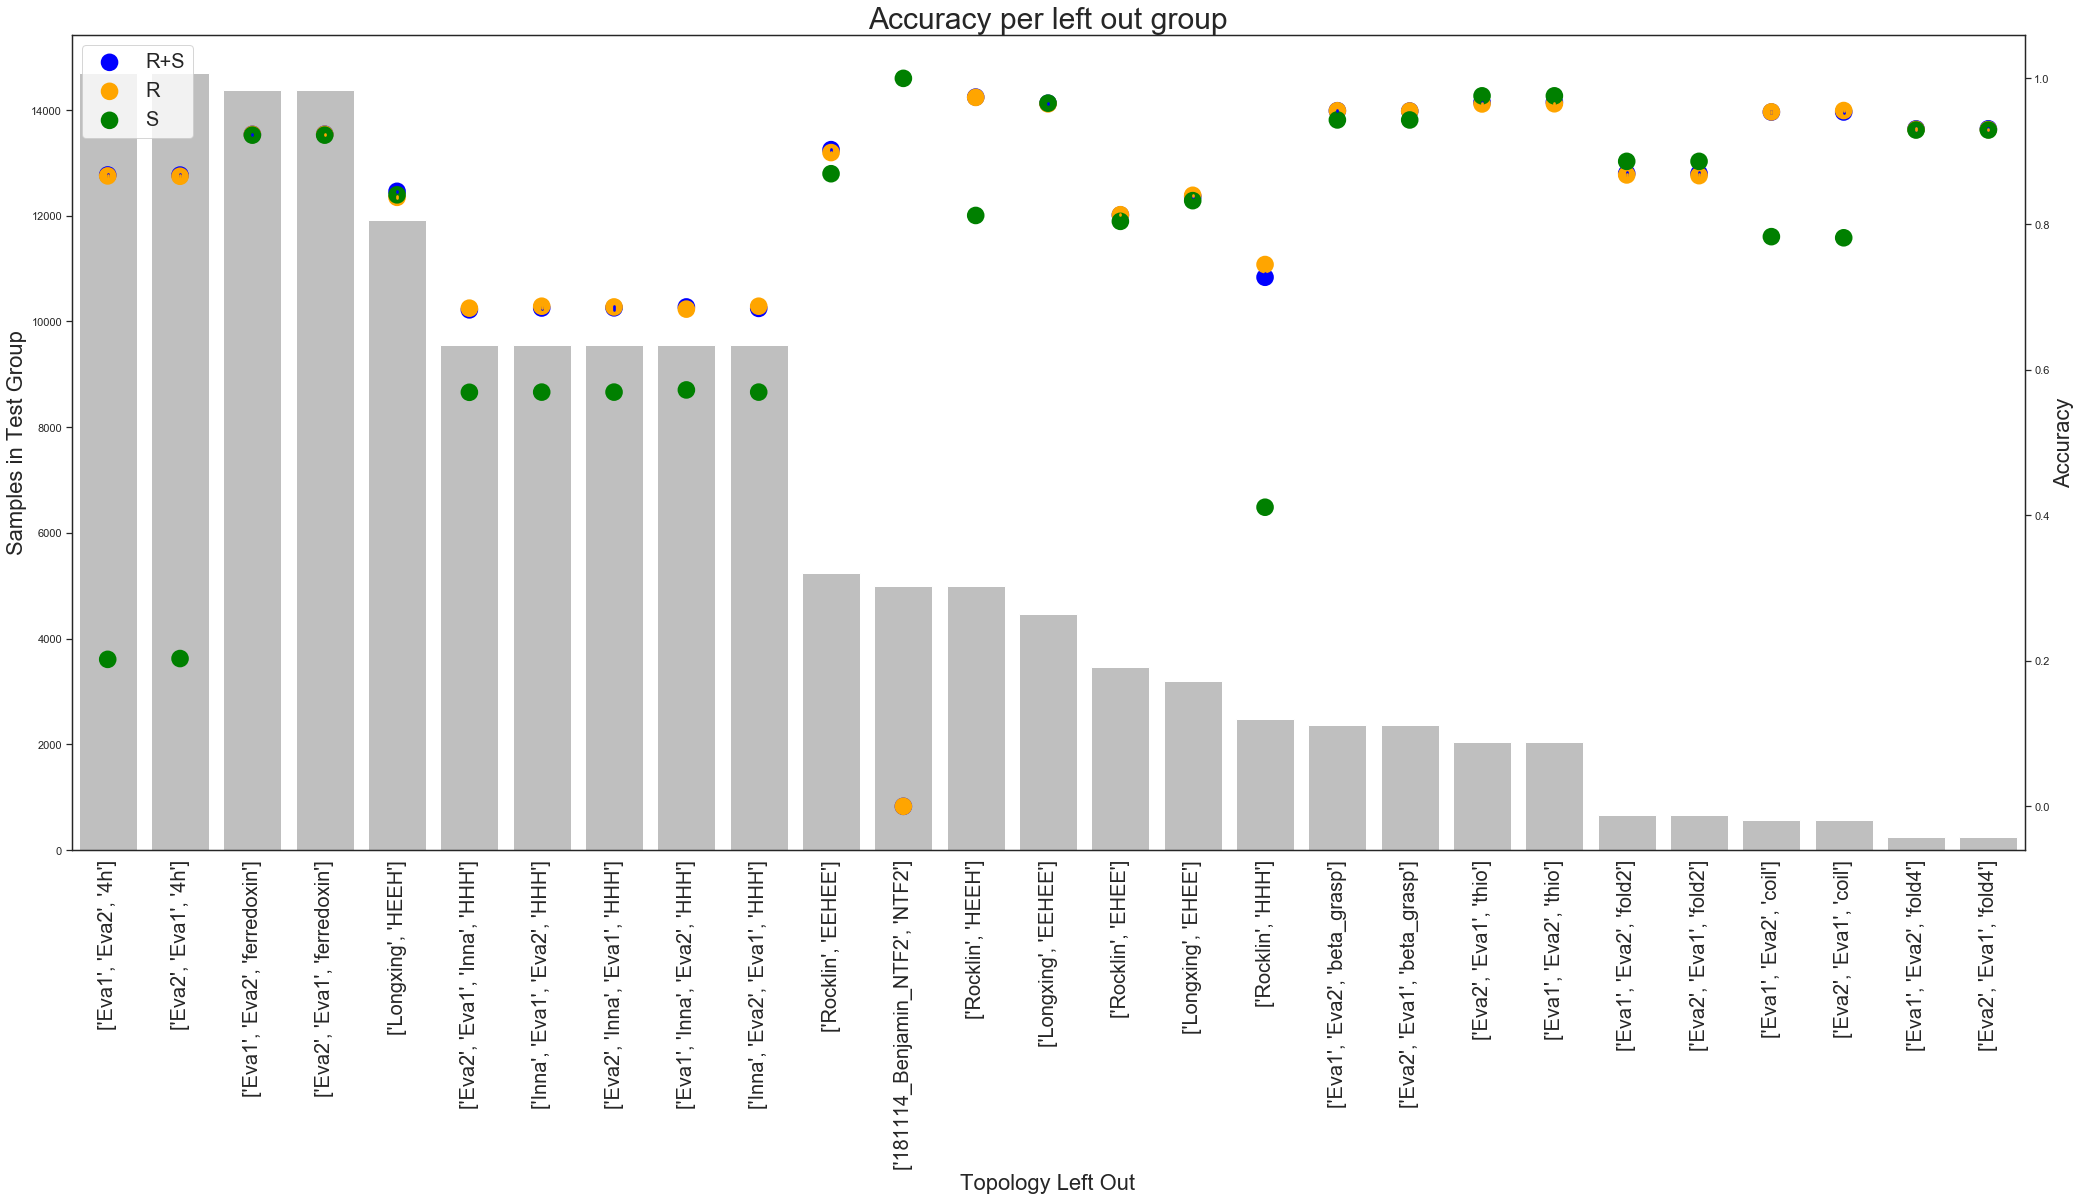

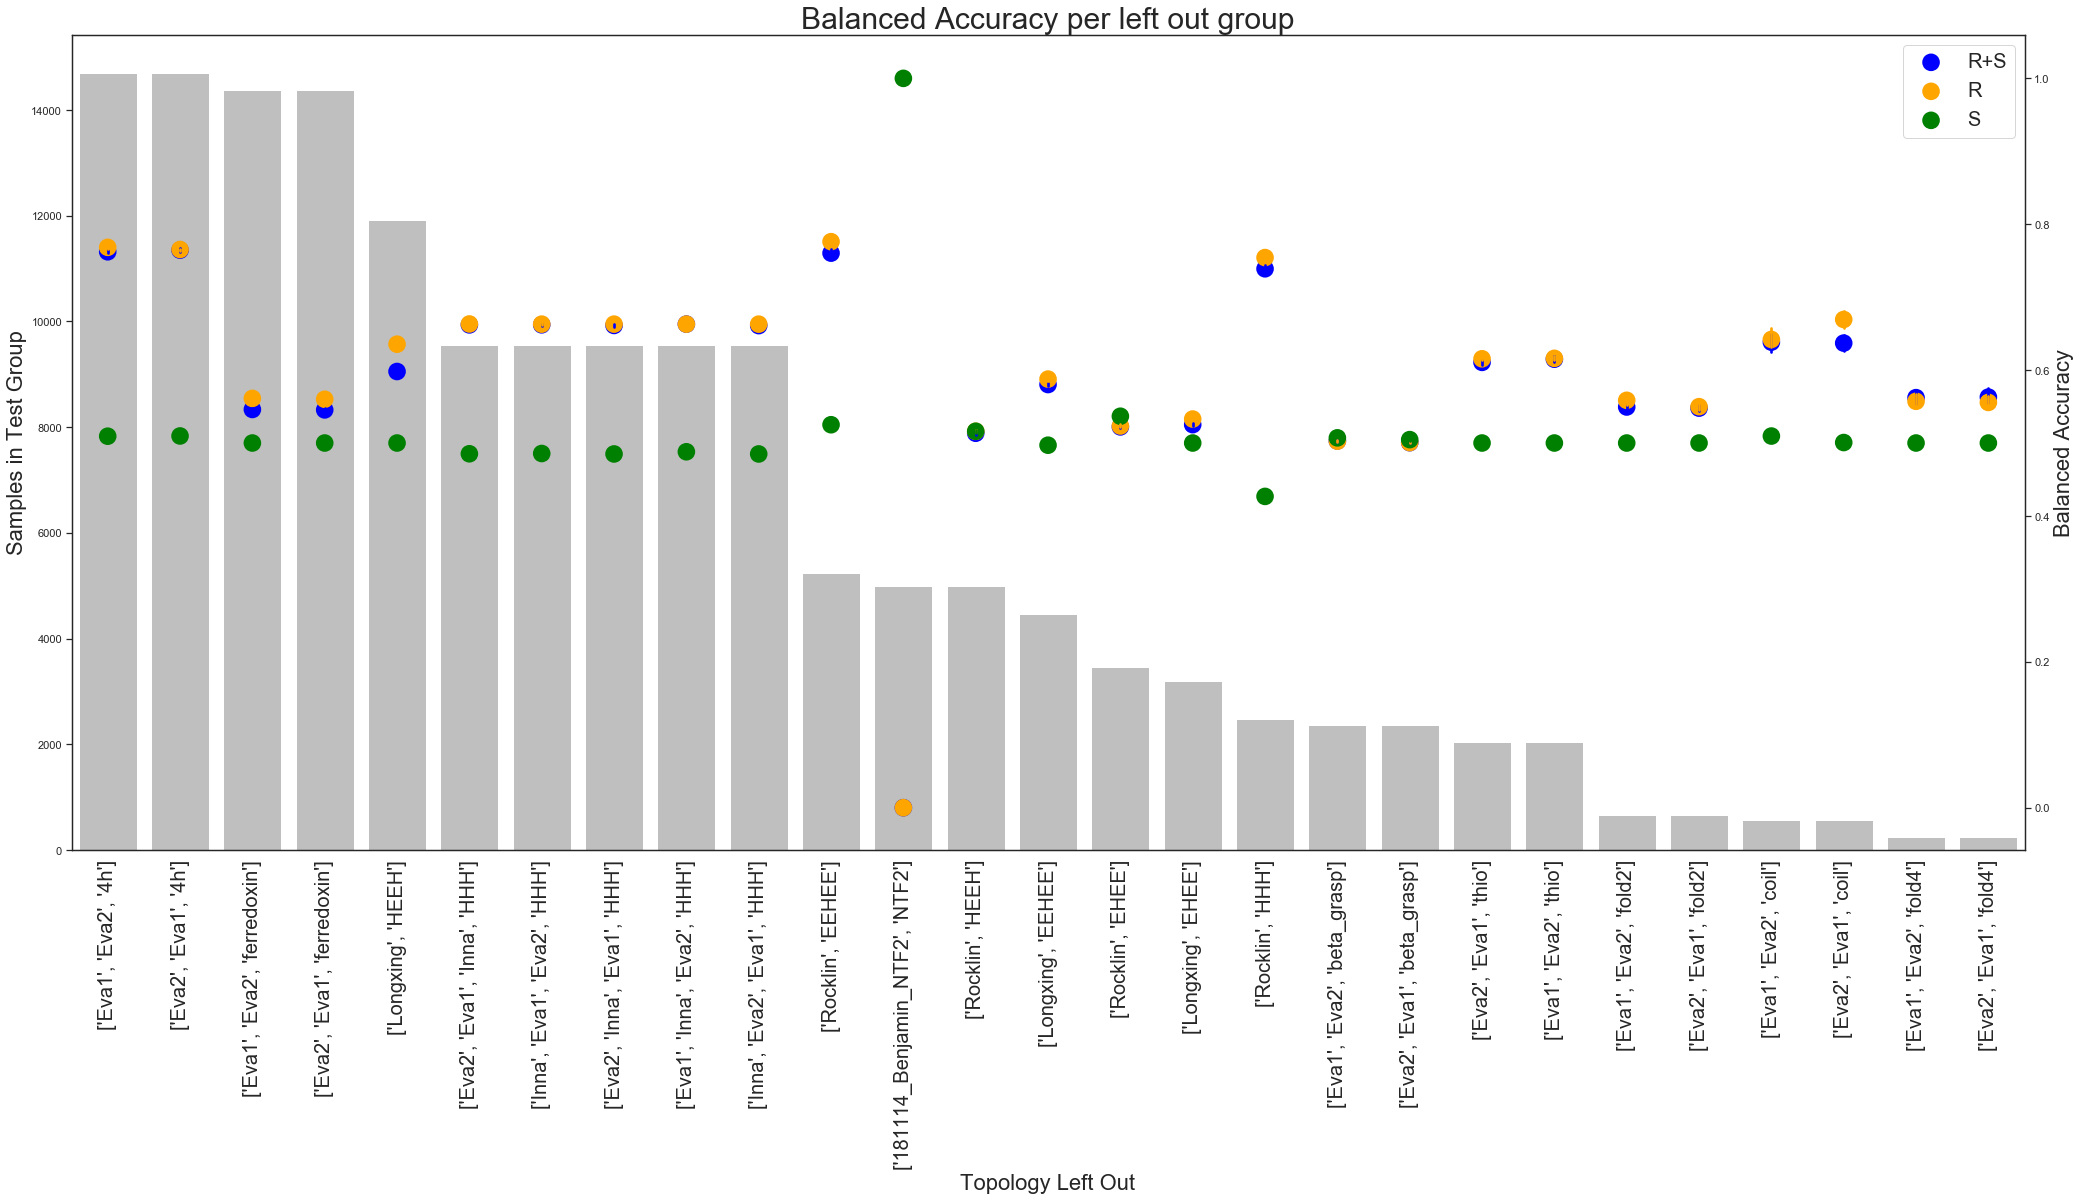

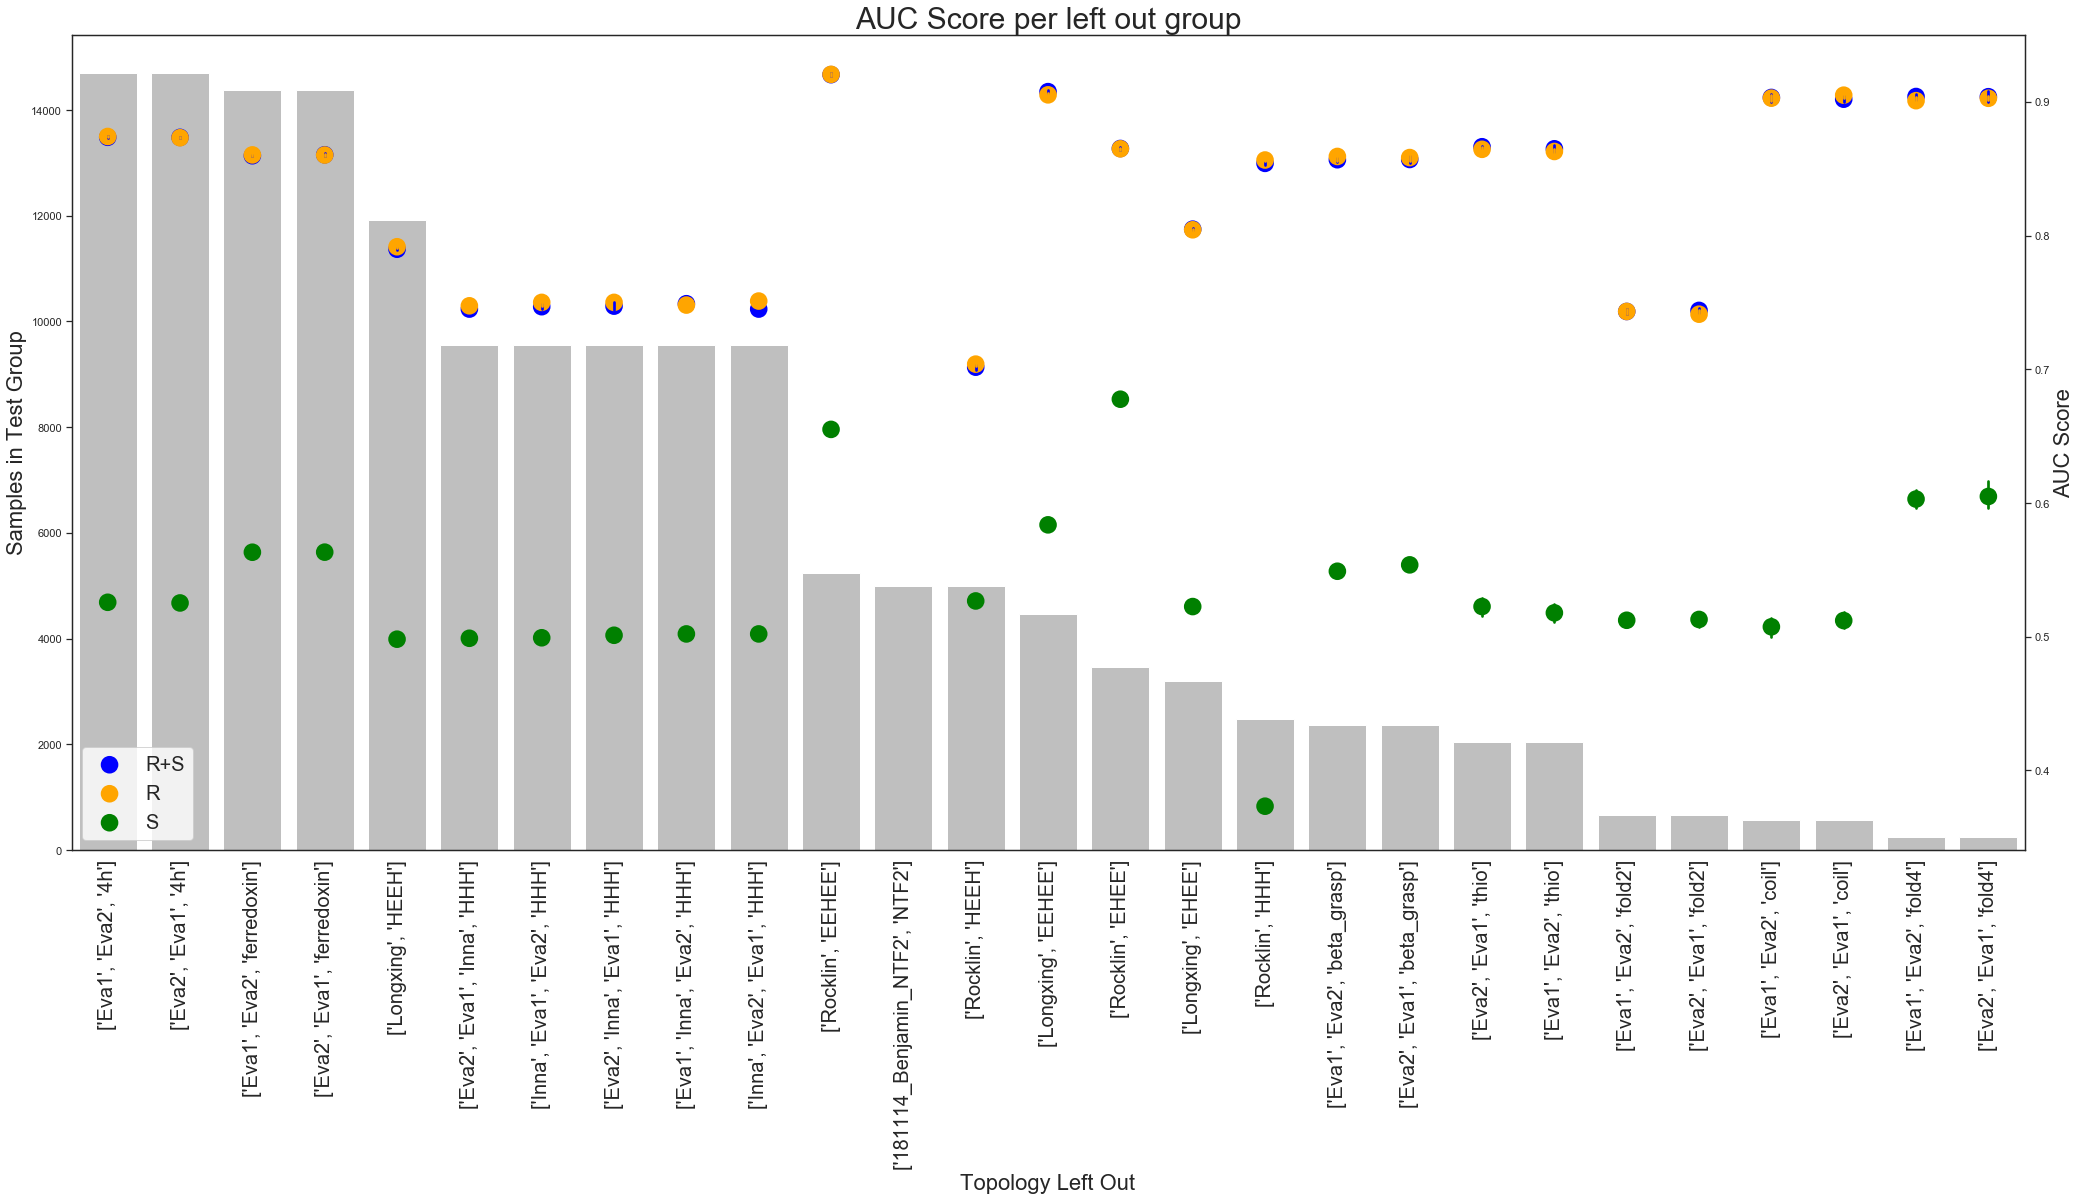

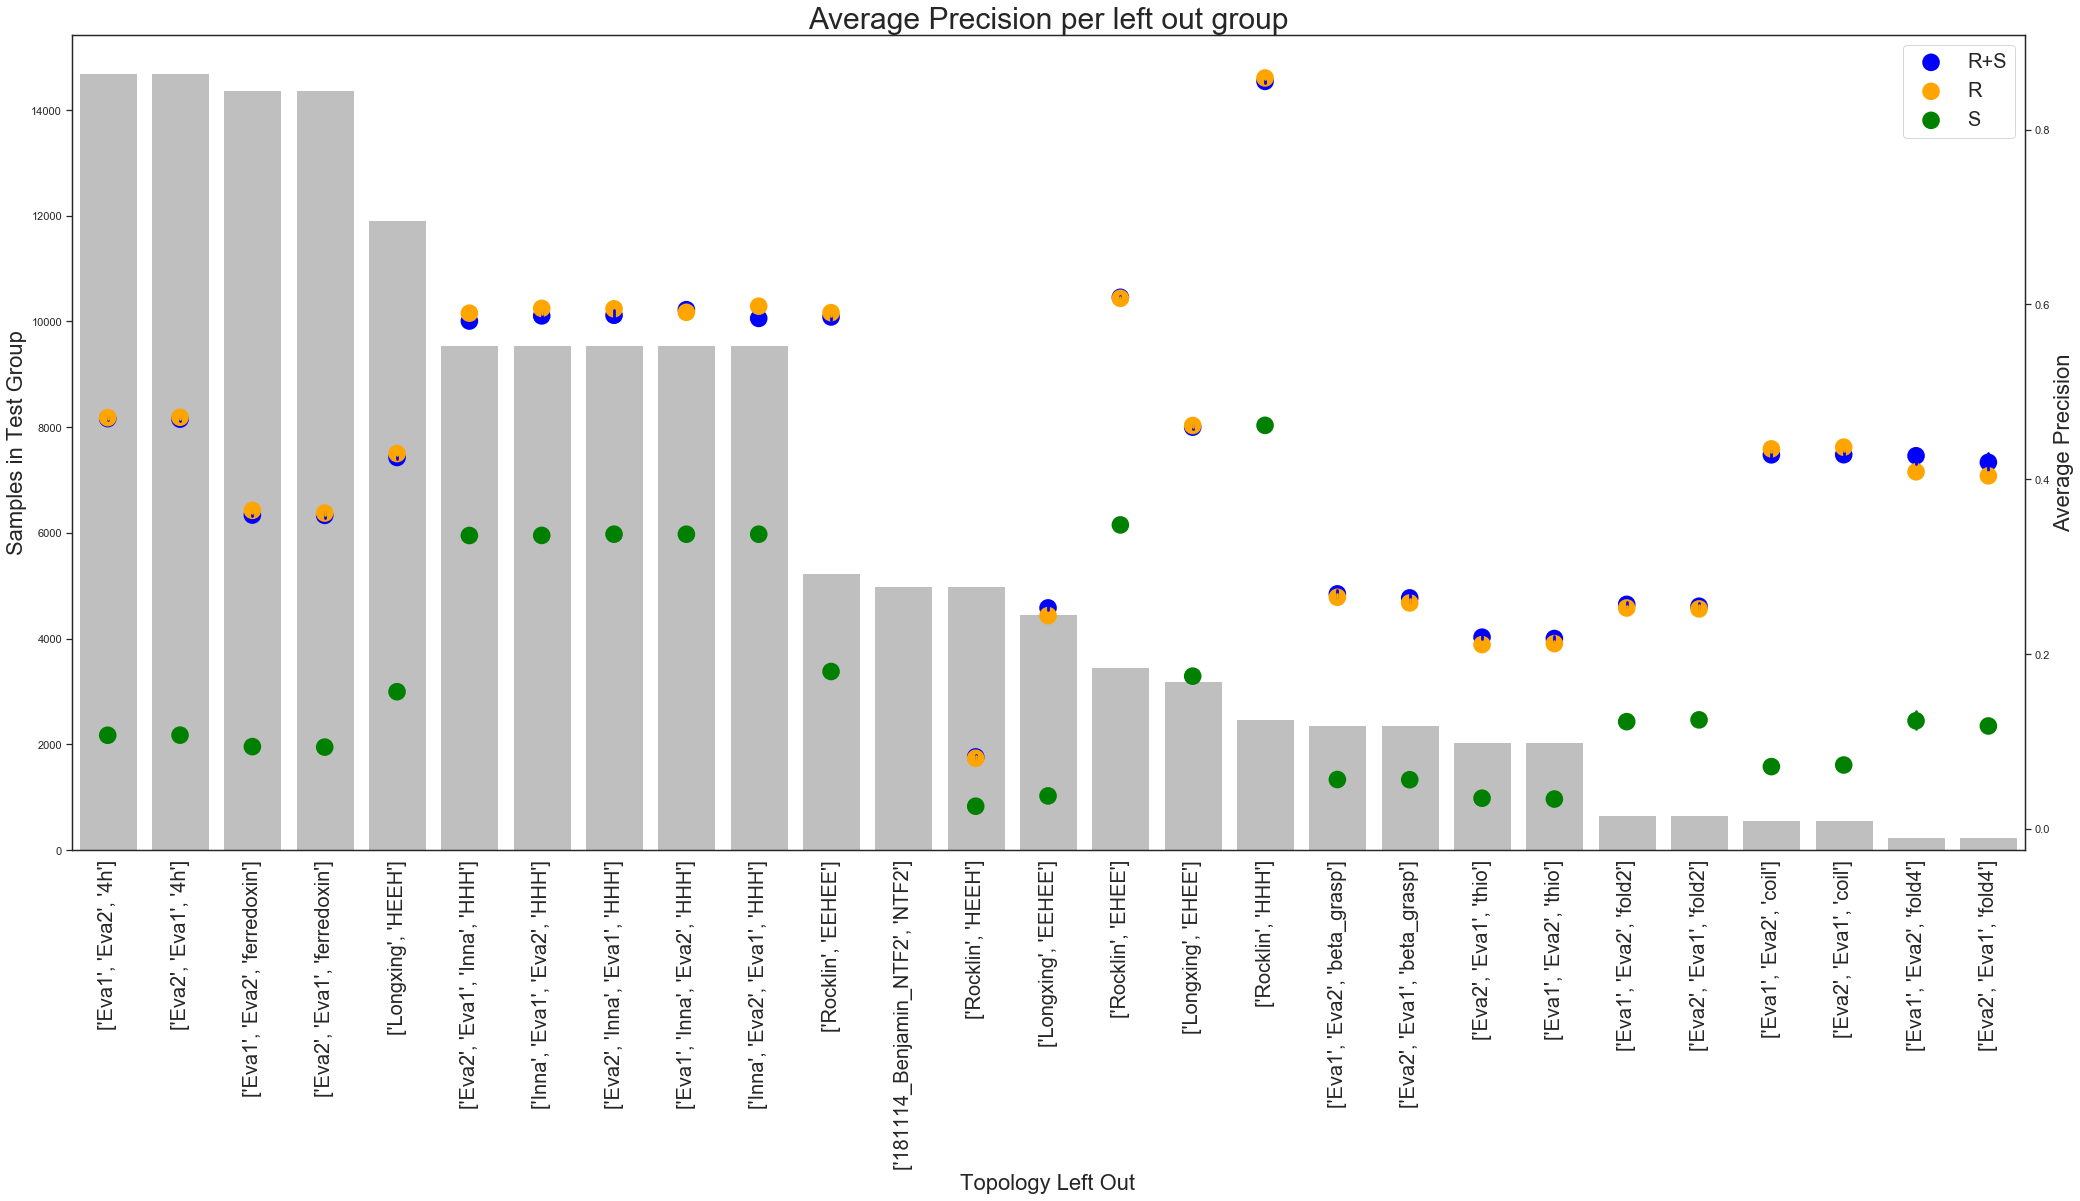

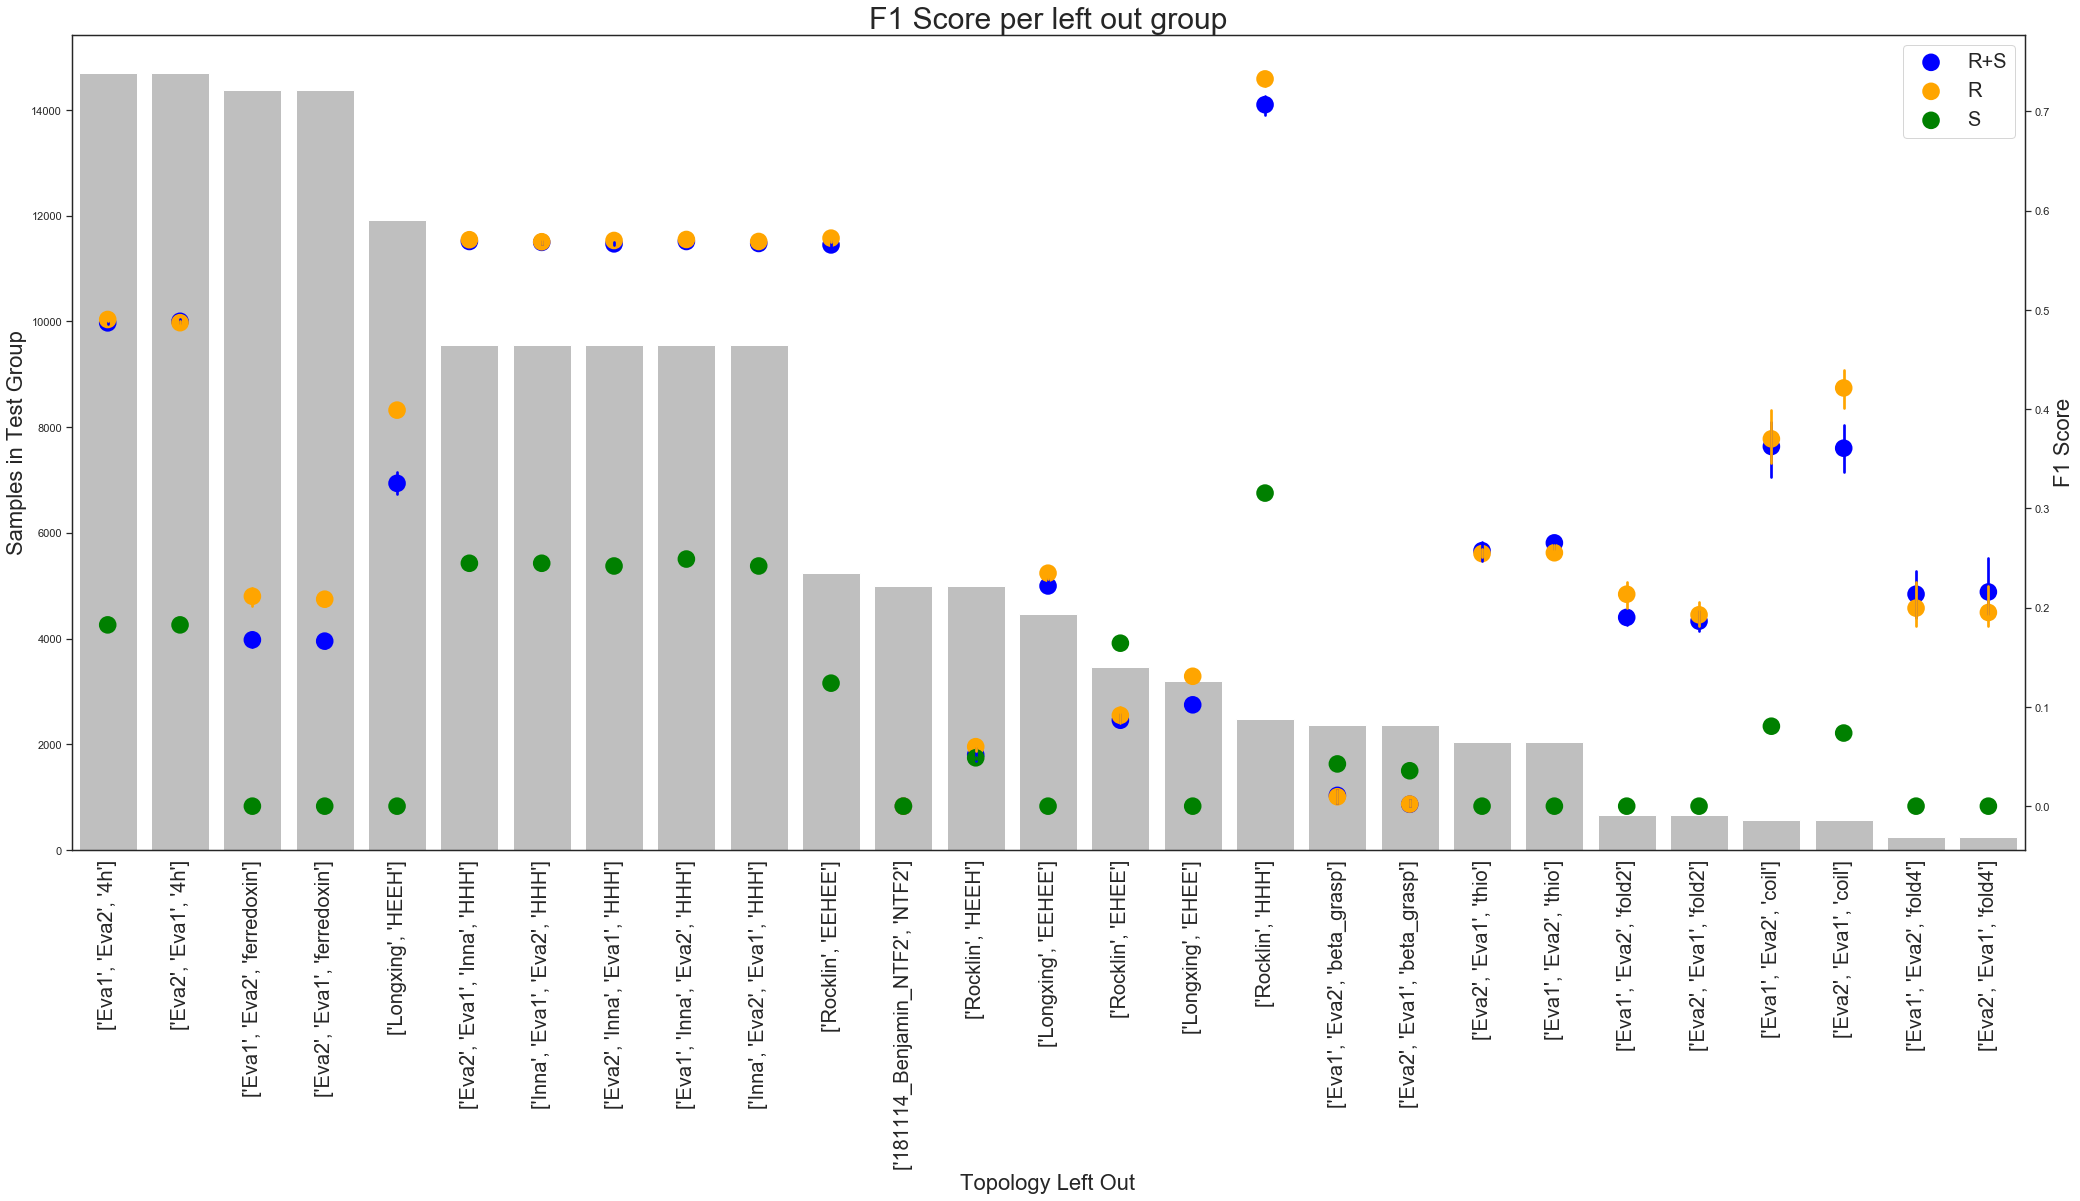

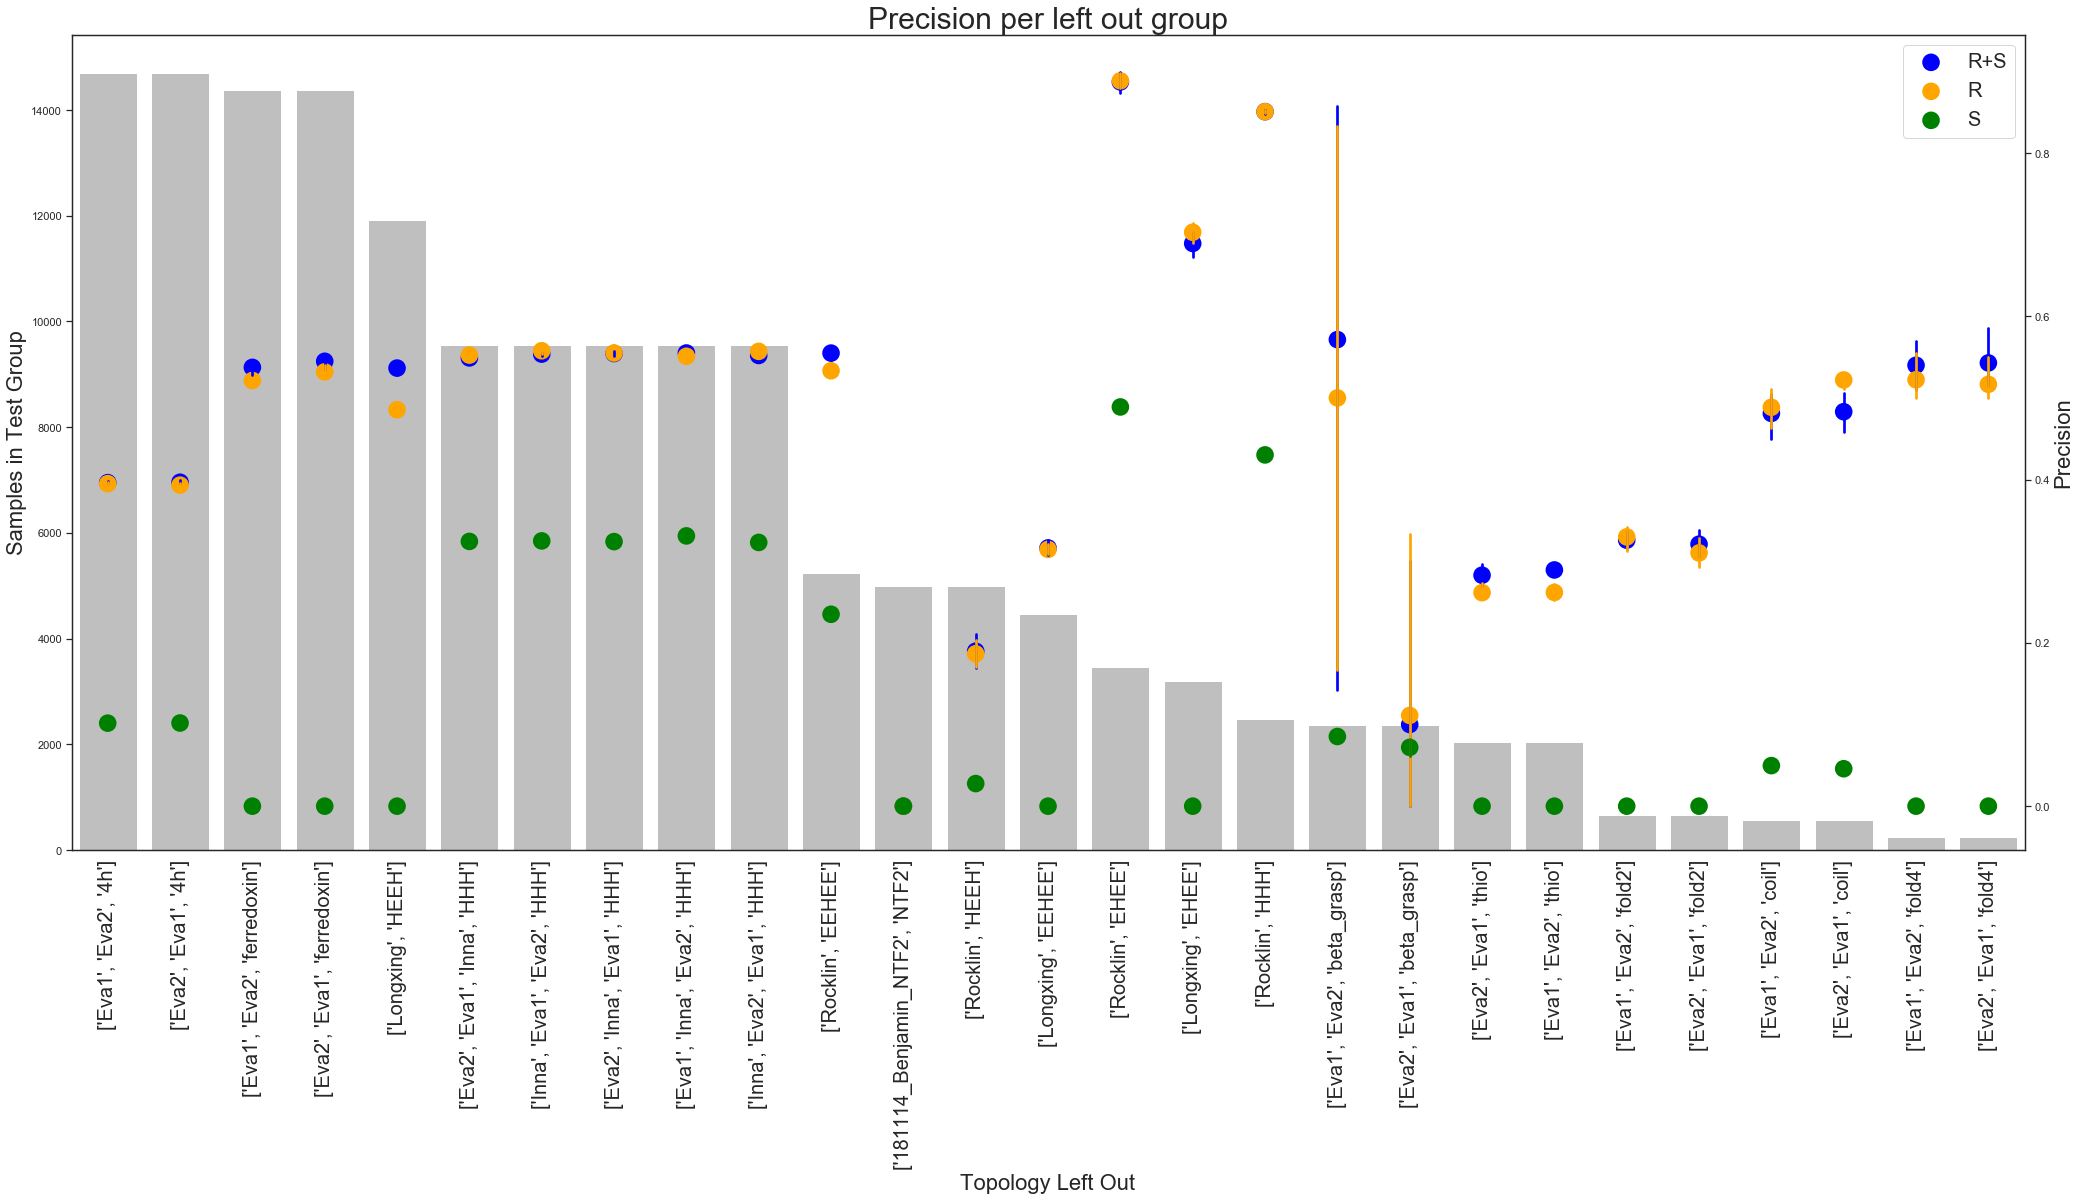

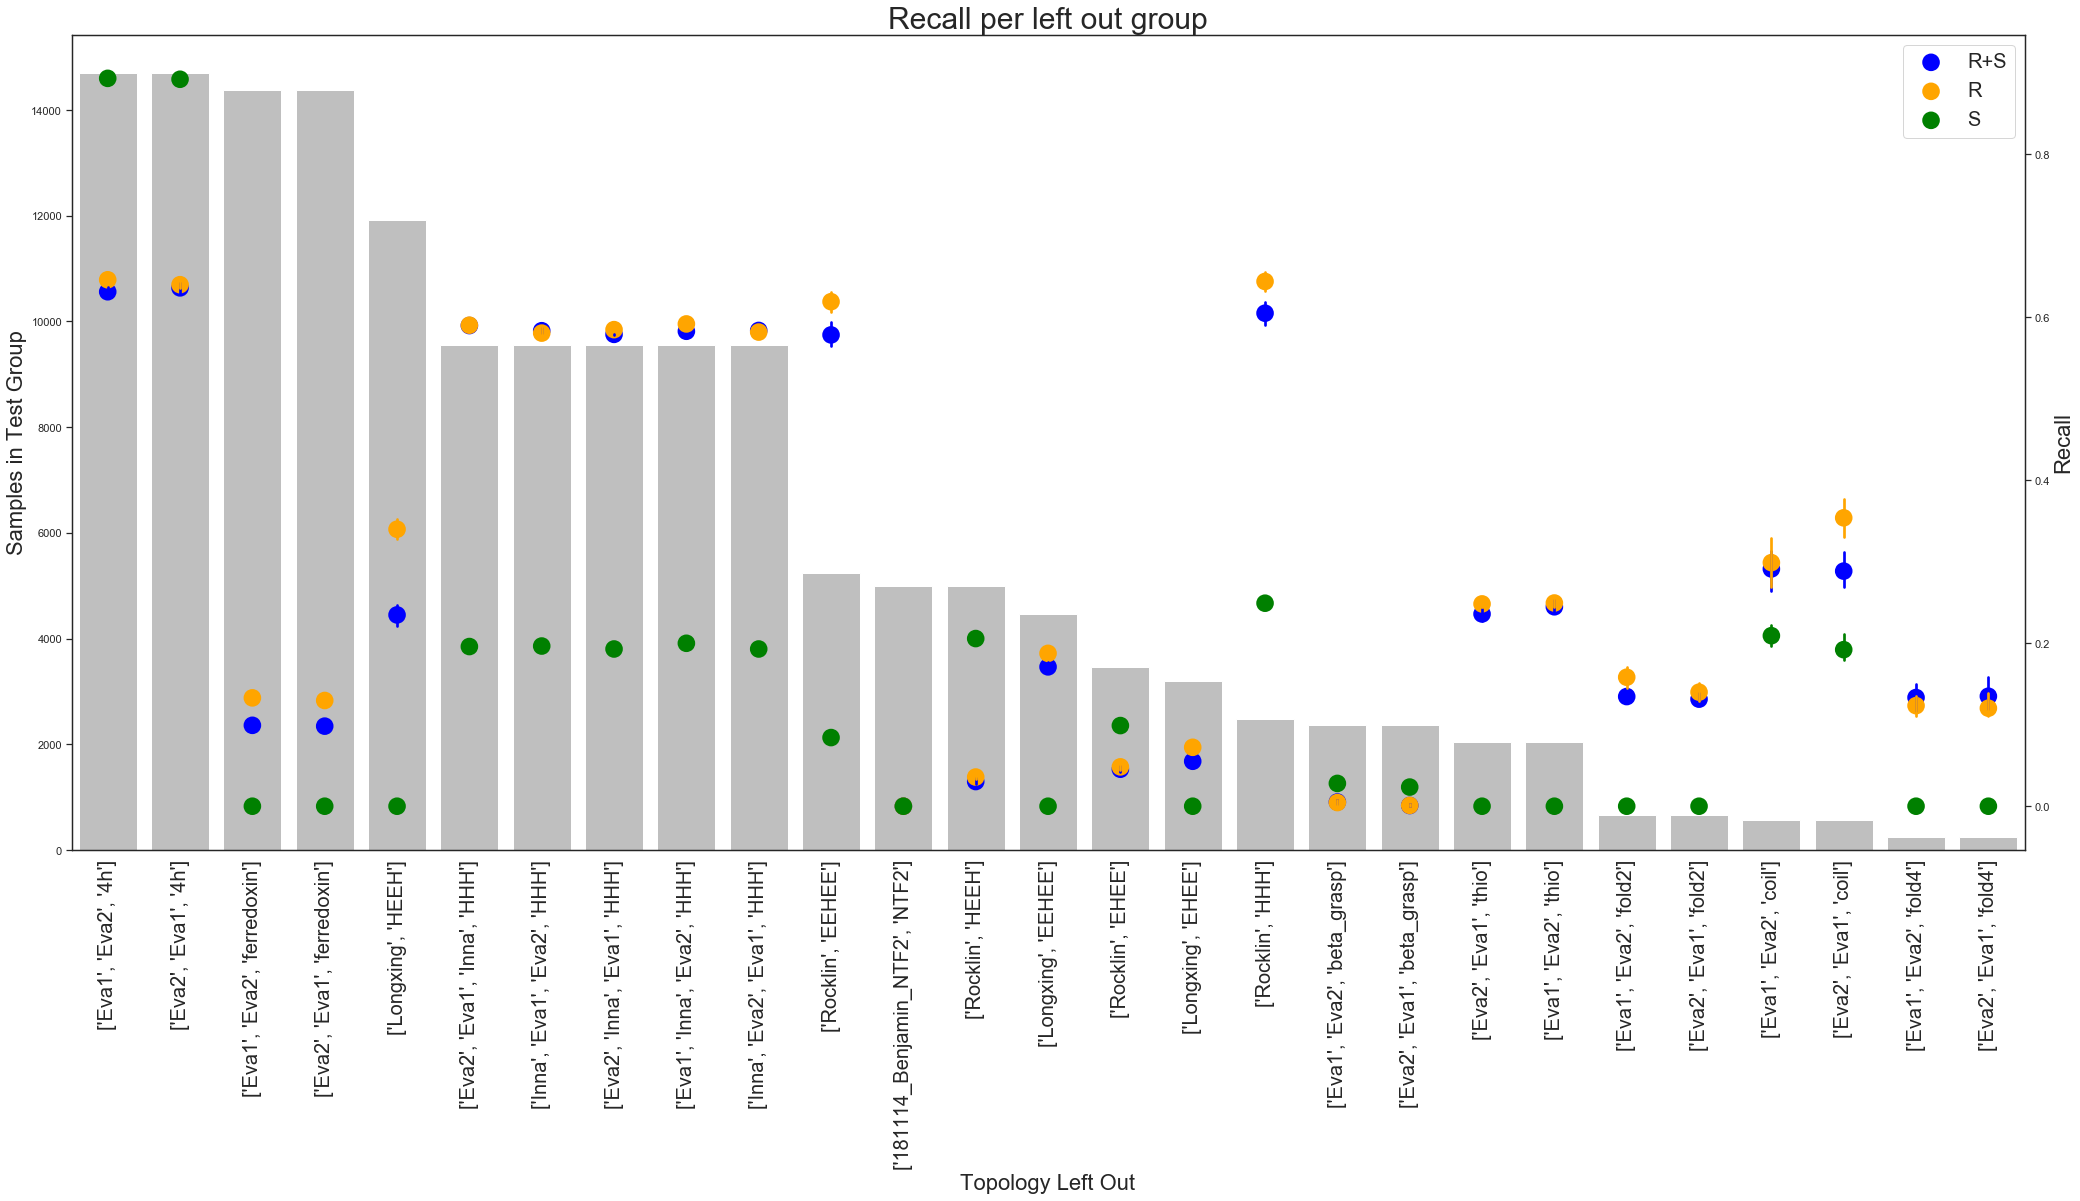

In [9]:
overall_results(
    file_path="./data/loo_detailed_classification_leaderboard.html",
    loo_run=True,
    topology_run=False,
    general_run=False,
    model_description_column='Data and Split Description',
    metric='clf'
               )

### Regressor Results

Printing number of instances per group:
['Rocklin', 'HHH']                 3
['Longxing', 'HEEH']               3
['Longxing', 'EEHEE']              3
['Rocklin', 'EEHEE']               3
['Longxing', 'EHEE']               3
['Rocklin', 'HEEH']                3
['Rocklin', 'EHEE']                3
['Eva1', 'Eva2', '4h']             2
['Eva1', 'Eva2', 'thio']           2
['Eva1', 'Eva2', 'ferredoxin']     2
['Inna', 'Eva1', 'Eva2', 'HHH']    2
['Eva1', 'Eva2', 'beta_grasp']     2
['Eva1', 'Eva2', 'coil']           2
['Eva1', 'Eva2', 'fold2']          2
['Eva1', 'Eva2', 'fold4']          2
['Eva2', 'Eva1', 'fold2']          1
['Inna', 'Eva2', 'Eva1', 'HHH']    1
['Eva2', 'Eva1', 'ferredoxin']     1
['Eva2', 'Eva1', '4h']             1
['Eva2', 'Eva1', 'beta_grasp']     1
['Eva2', 'Eva1', 'thio']           1
['Eva2', 'Eva1', 'coil']           1
['Eva2', 'Eva1', 'fold4']          1
Name: Test Group, dtype: int64

Plotting Trends:


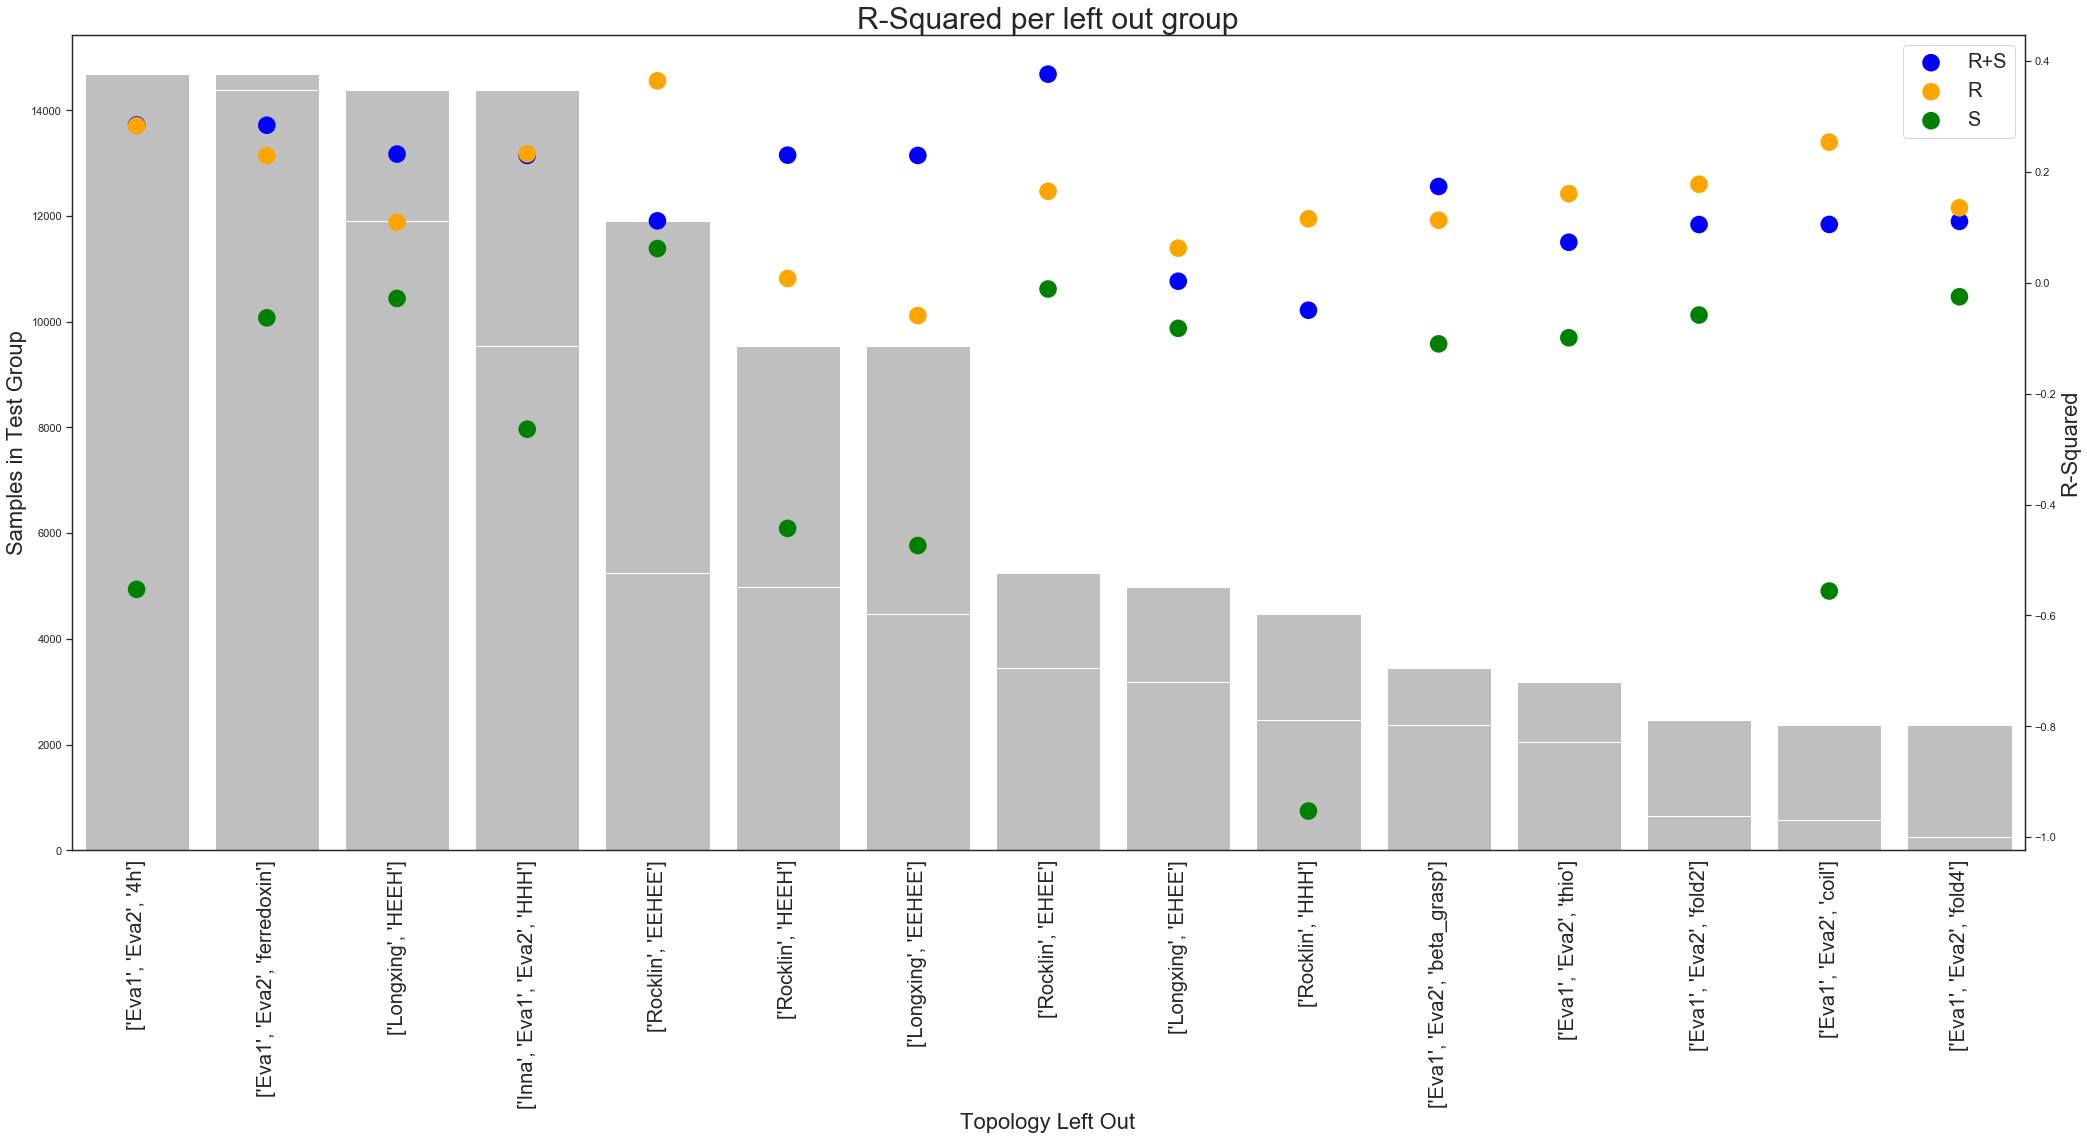

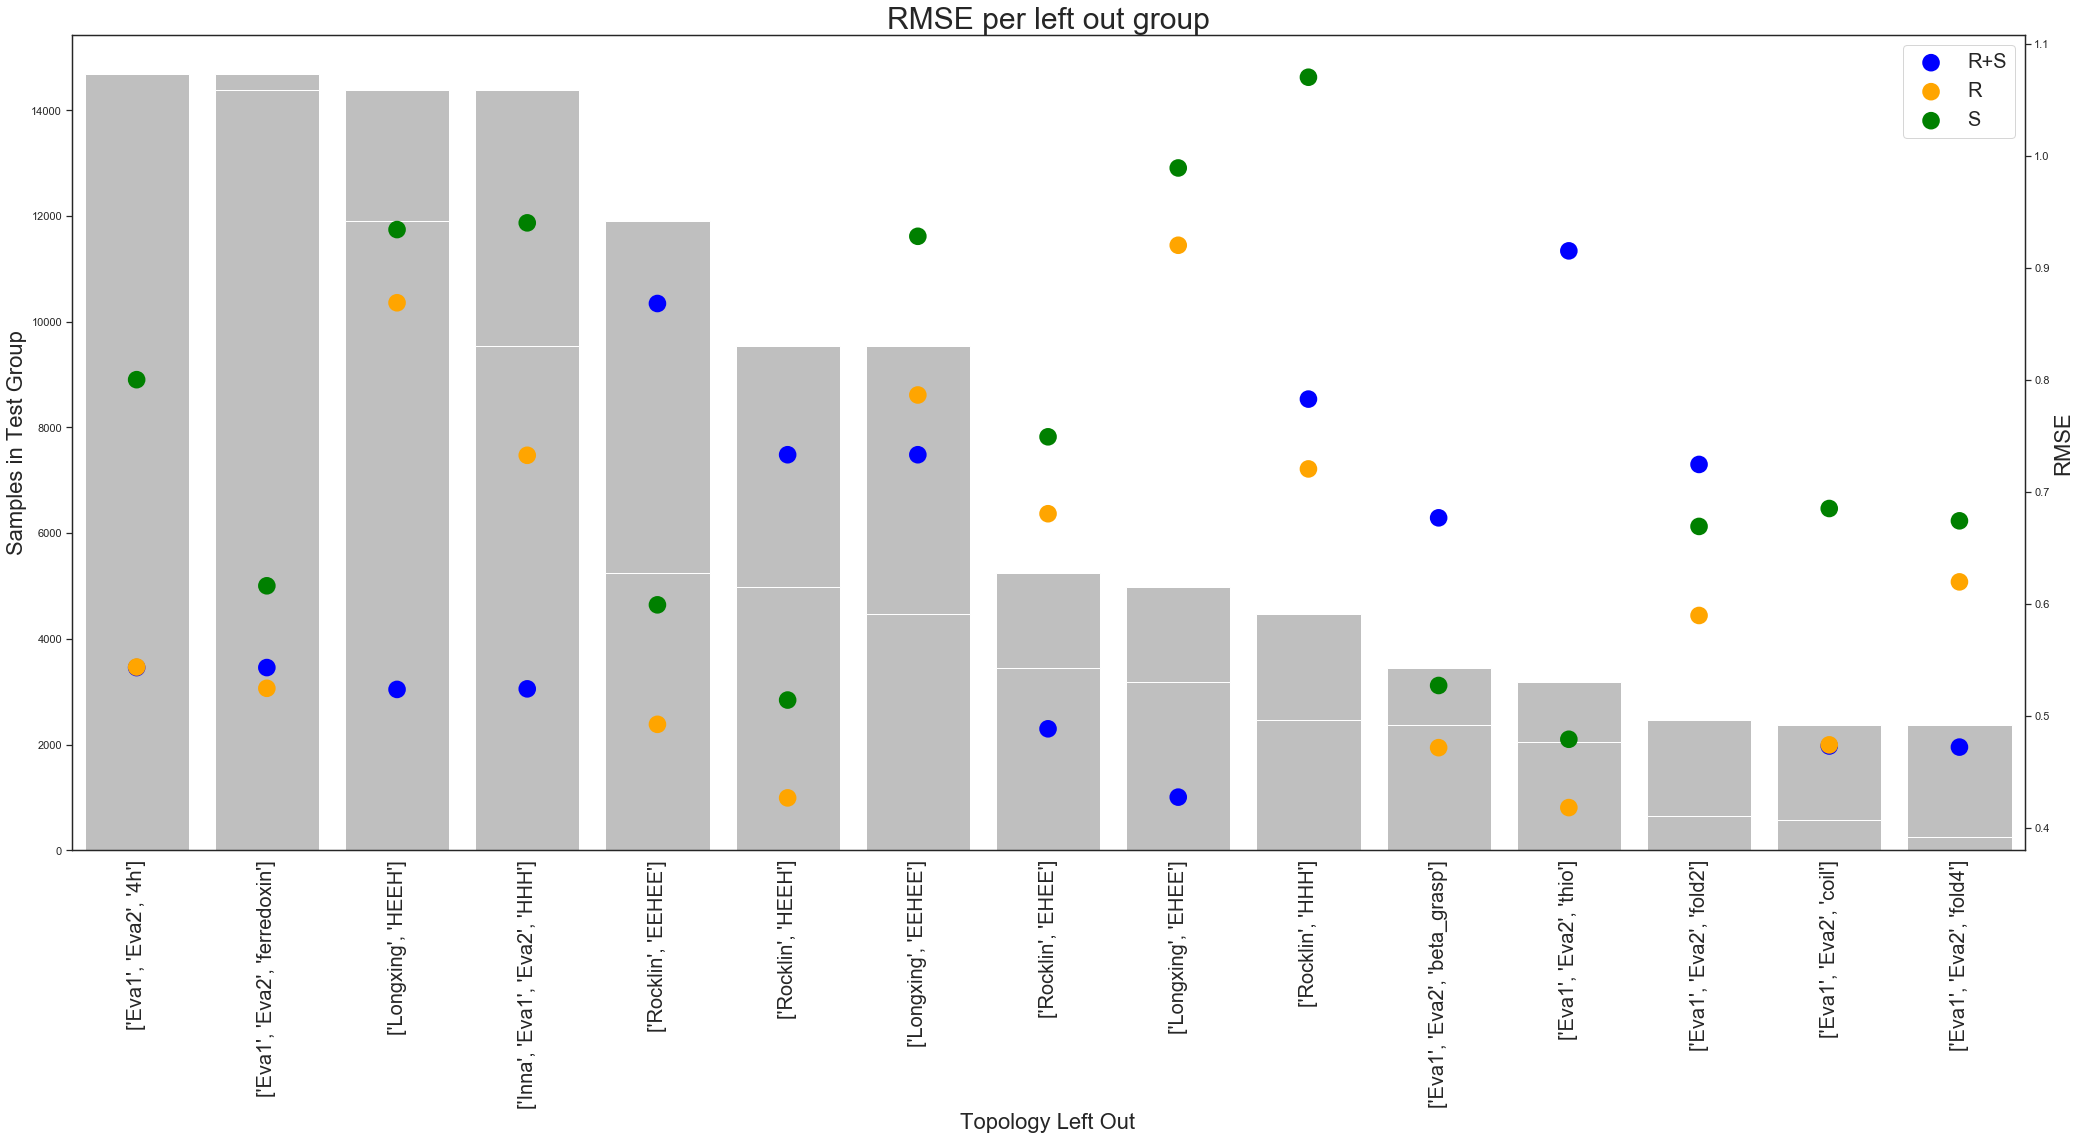

In [10]:
overall_results(
    file_path="./data/loo_detailed_regression_leaderboard.html",
    loo_run=True,
    topology_run=False,
    general_run=False,
    model_description_column='Data and Split Description',
    metric='rgr')

In [11]:
# load leaderboard with LOO Runs results
loo_leaderboard_rgr = pd.read_html("./data/loo_detailed_regression_leaderboard.html")[0]

# create a dataframe that contains R+S data
loo_rgr_rs = loo_leaderboard_rgr[loo_leaderboard_rgr['Data and Split Description']=='RS']
# create a dataframe that contains R data
loo_rgr_r = loo_leaderboard_rgr[loo_leaderboard_rgr['Data and Split Description']=='R']
# create a dataframe that contains S data
loo_rgr_s = loo_leaderboard_rgr[loo_leaderboard_rgr['Data and Split Description']=='S']

----------------------------

# Topology Specific Runs

**TODO**:
- explain what a topology specific run is
- highlight results from the graphs/data

--------------------------

### Classifier Results

HEEH          117
4h            117
ferredoxin    115
HHH           114
EEHEE         114
EHEE          111
coil          105
fold4         105
beta_grasp    105
fold2         105
thio          105
Name: topology, dtype: int64
Plotting Trends:


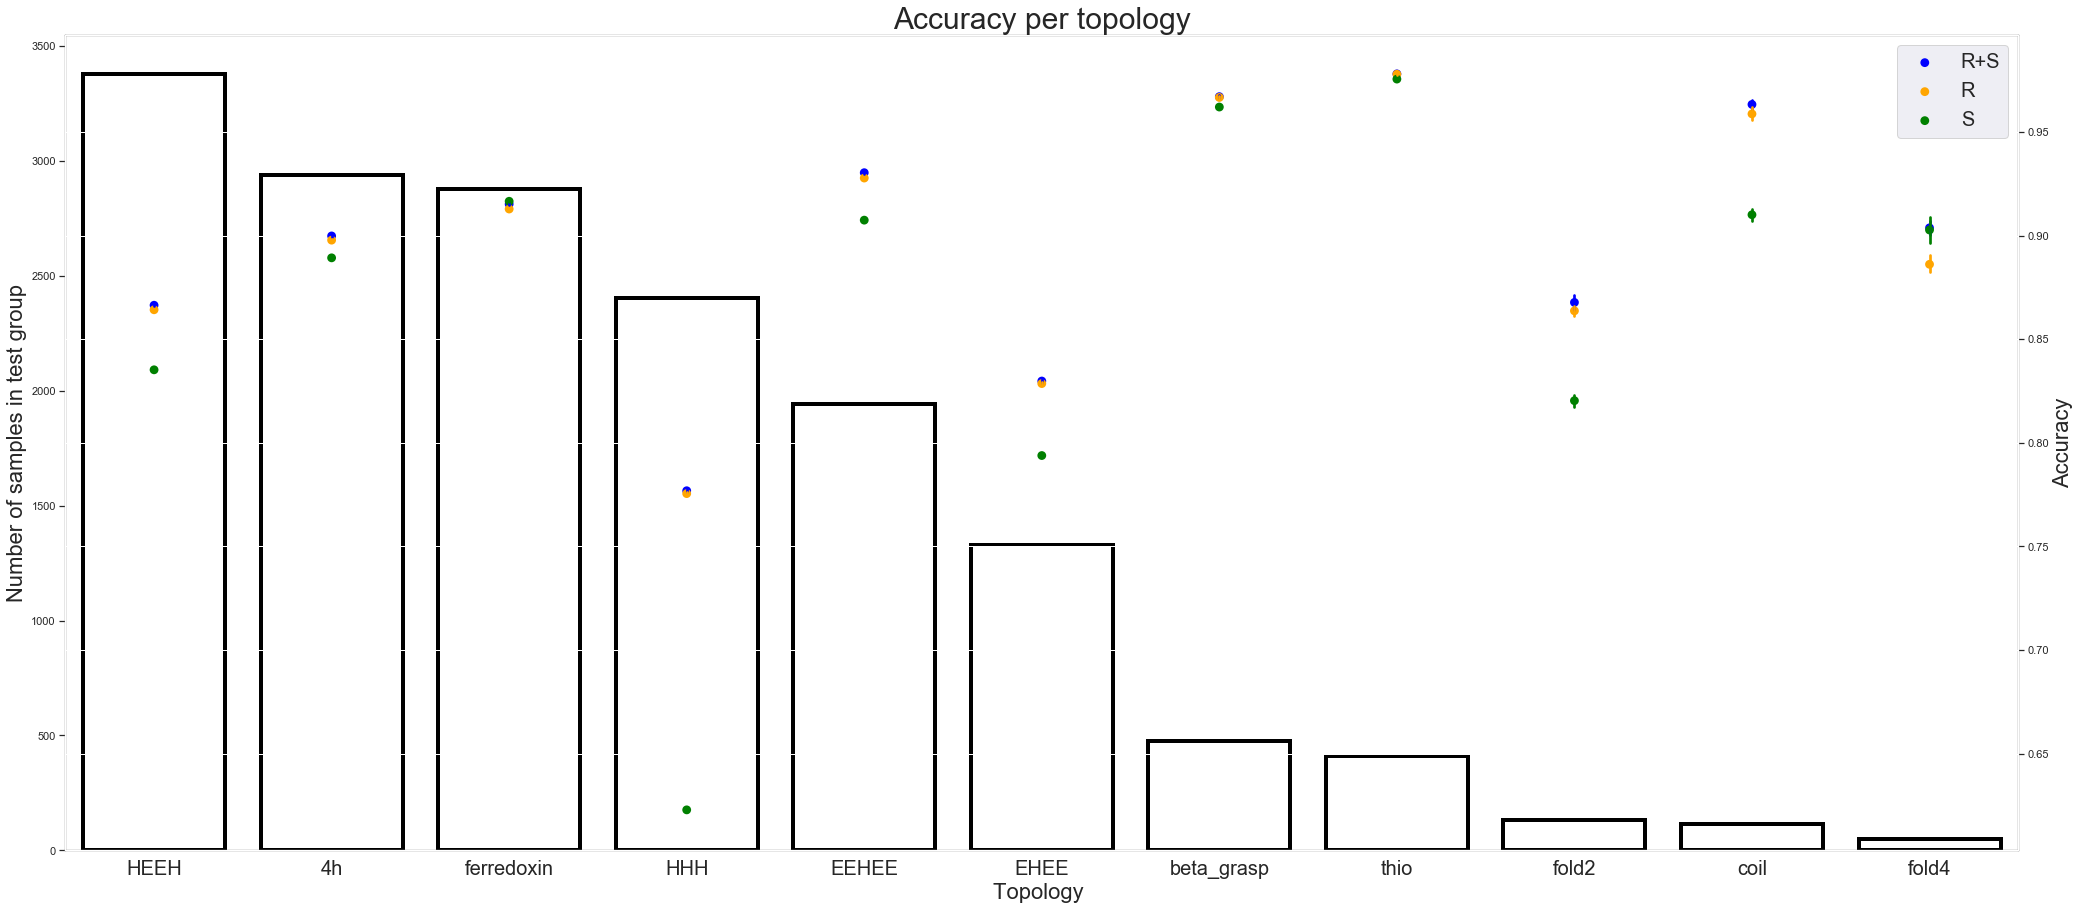

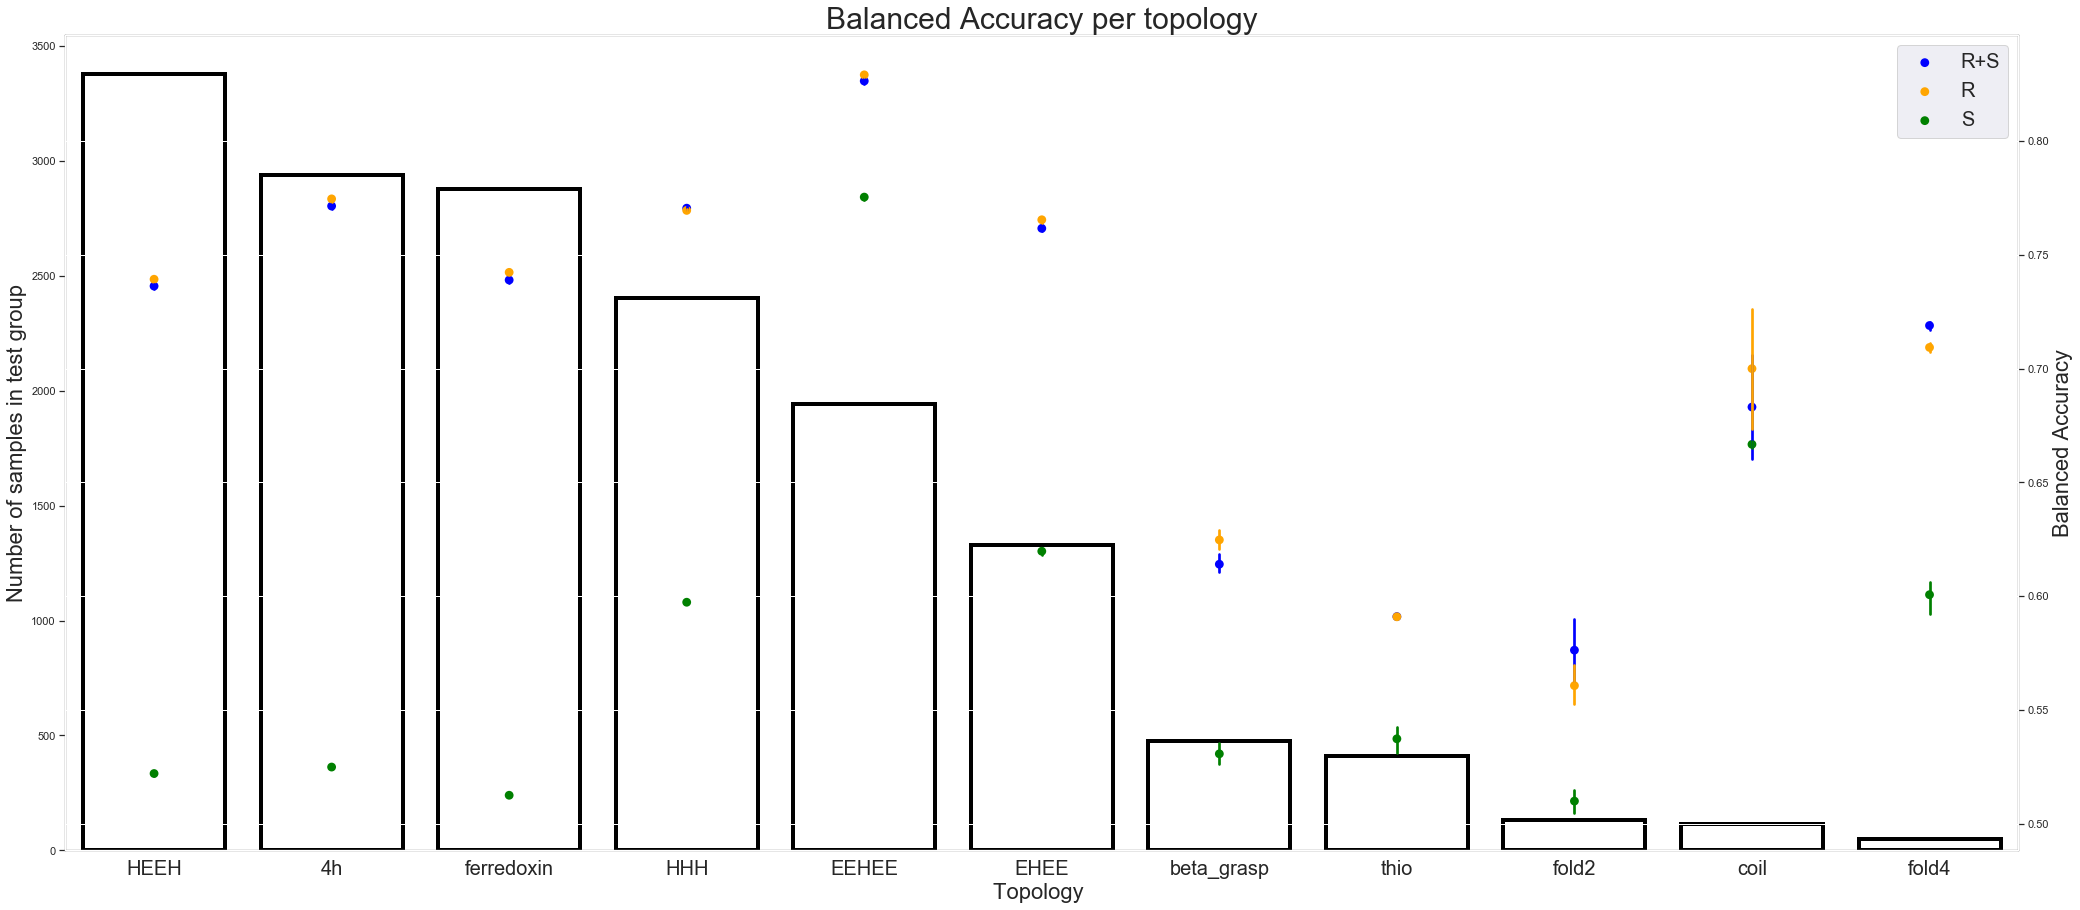

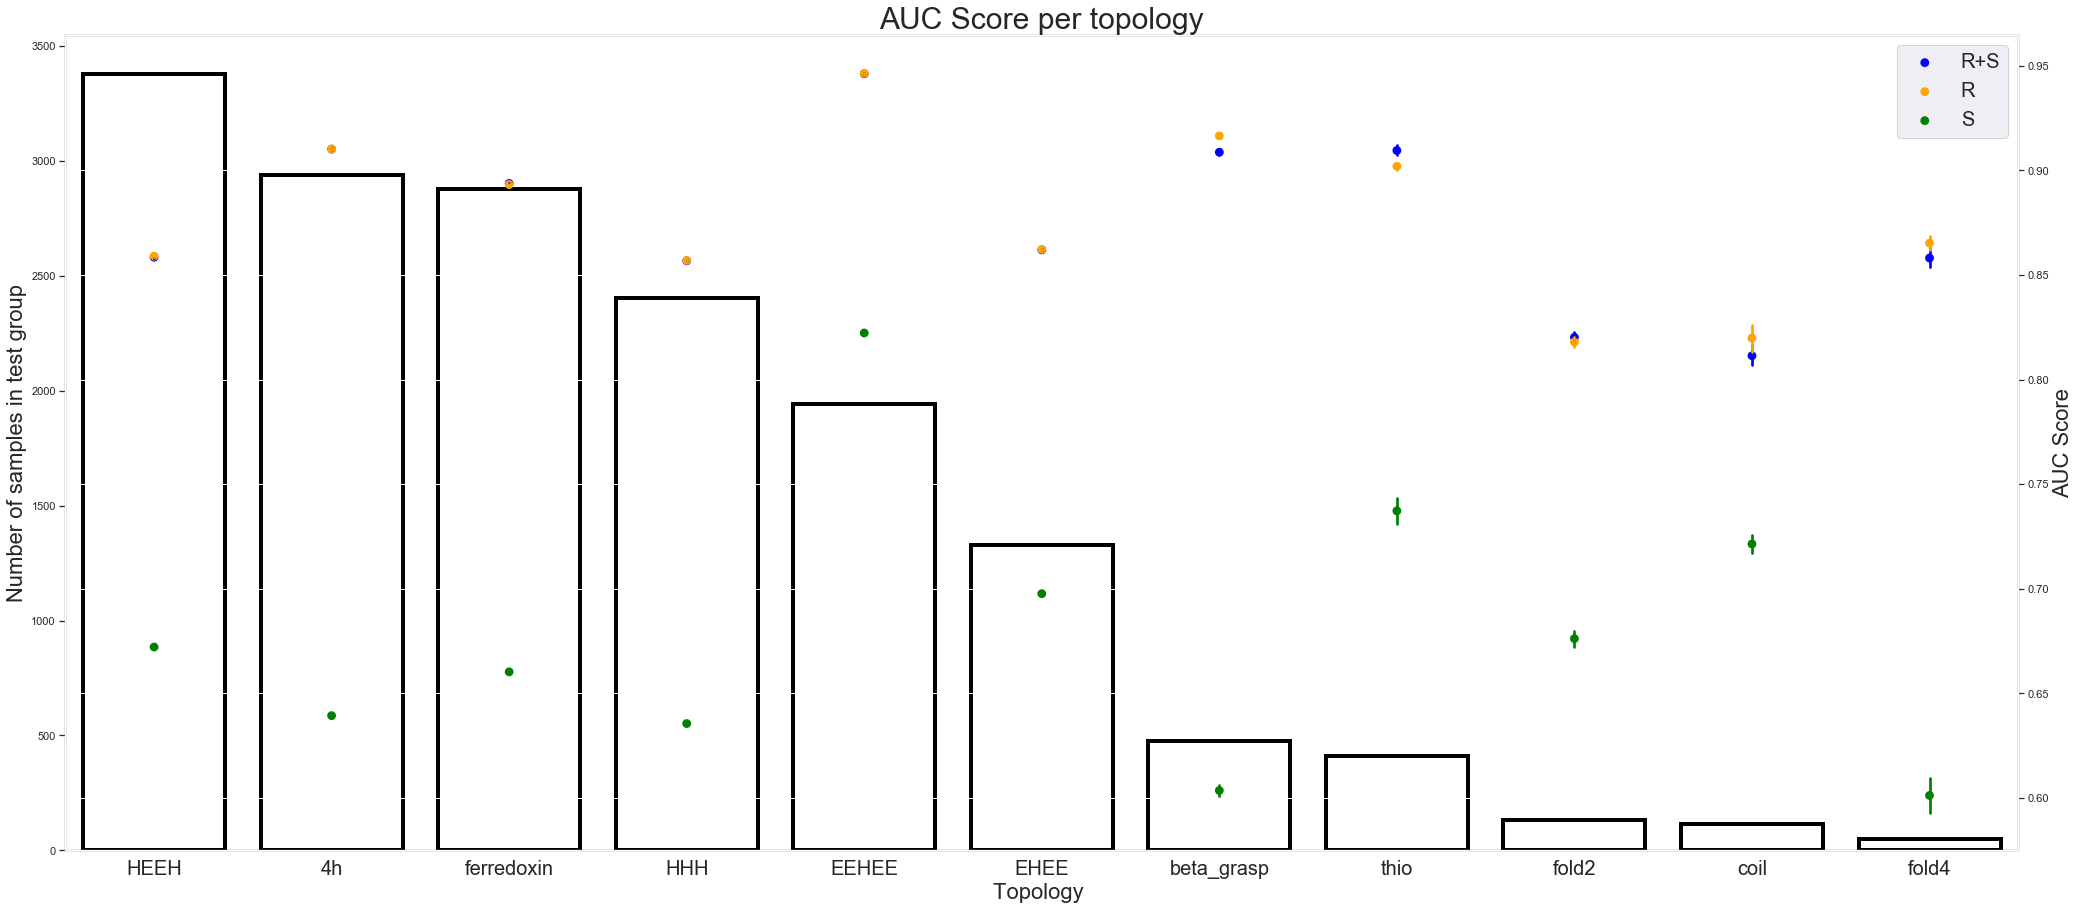

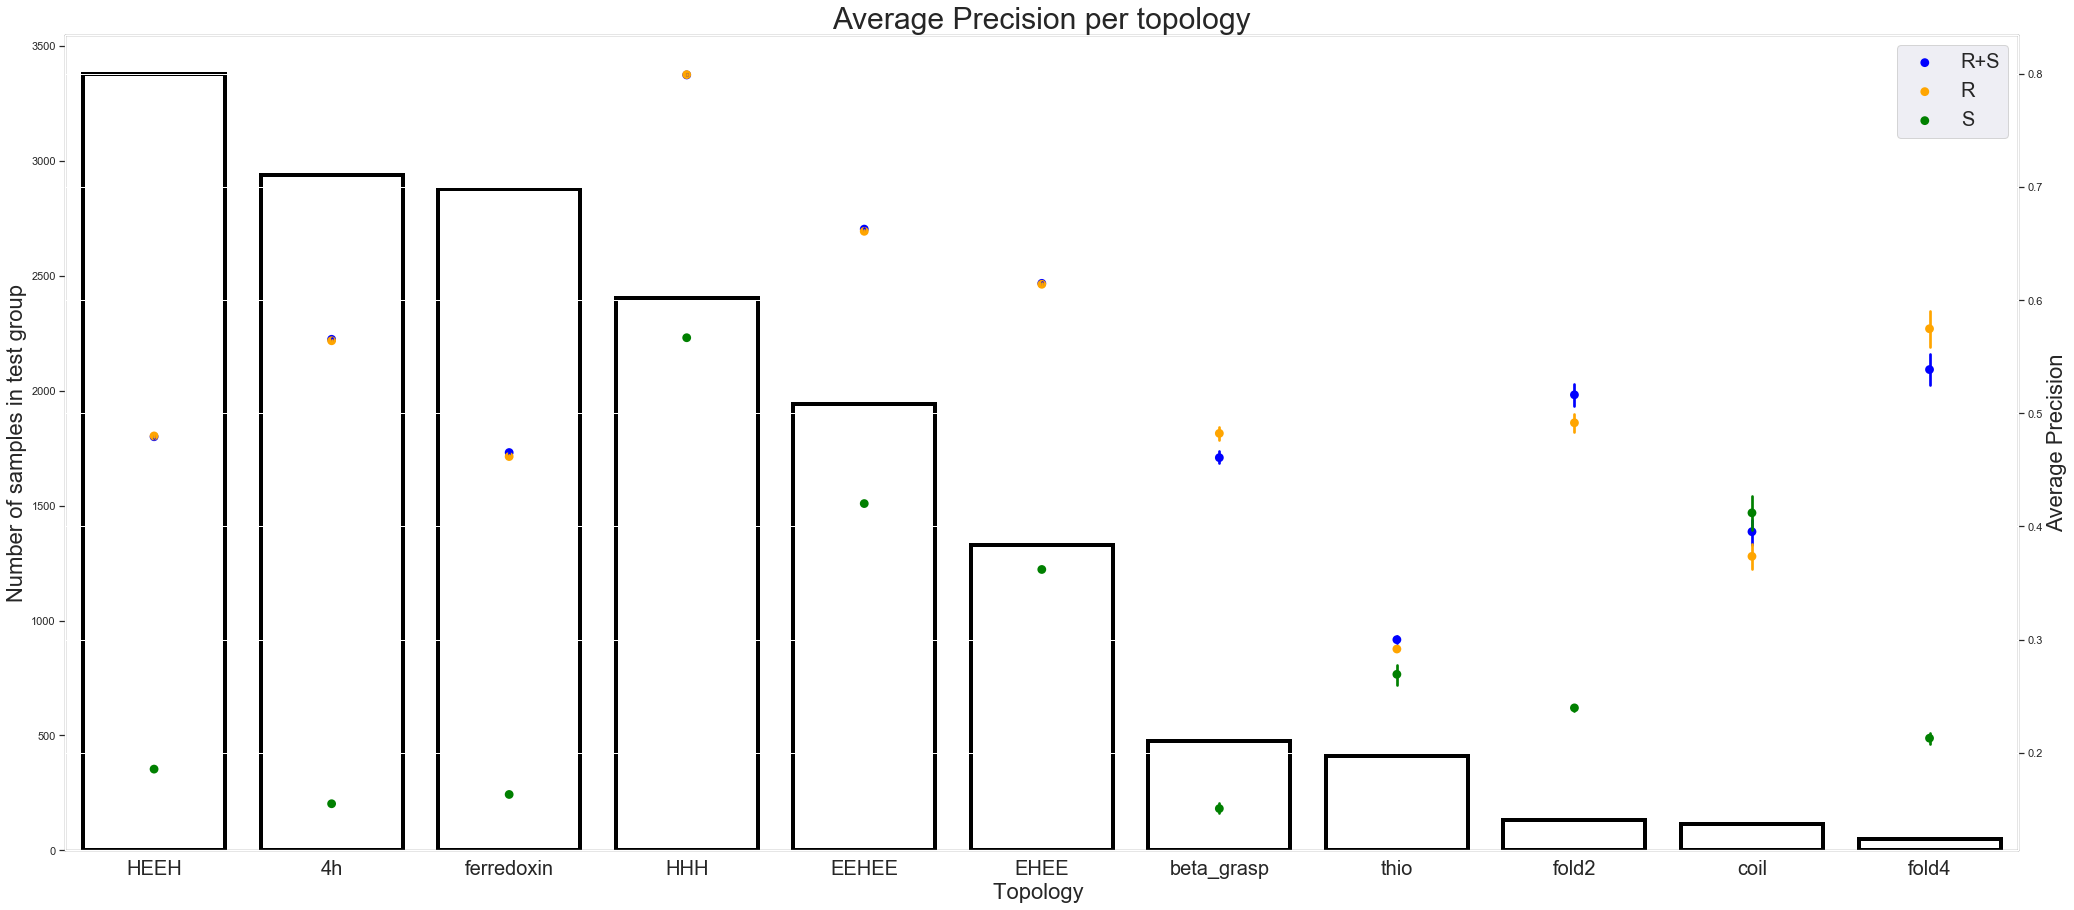

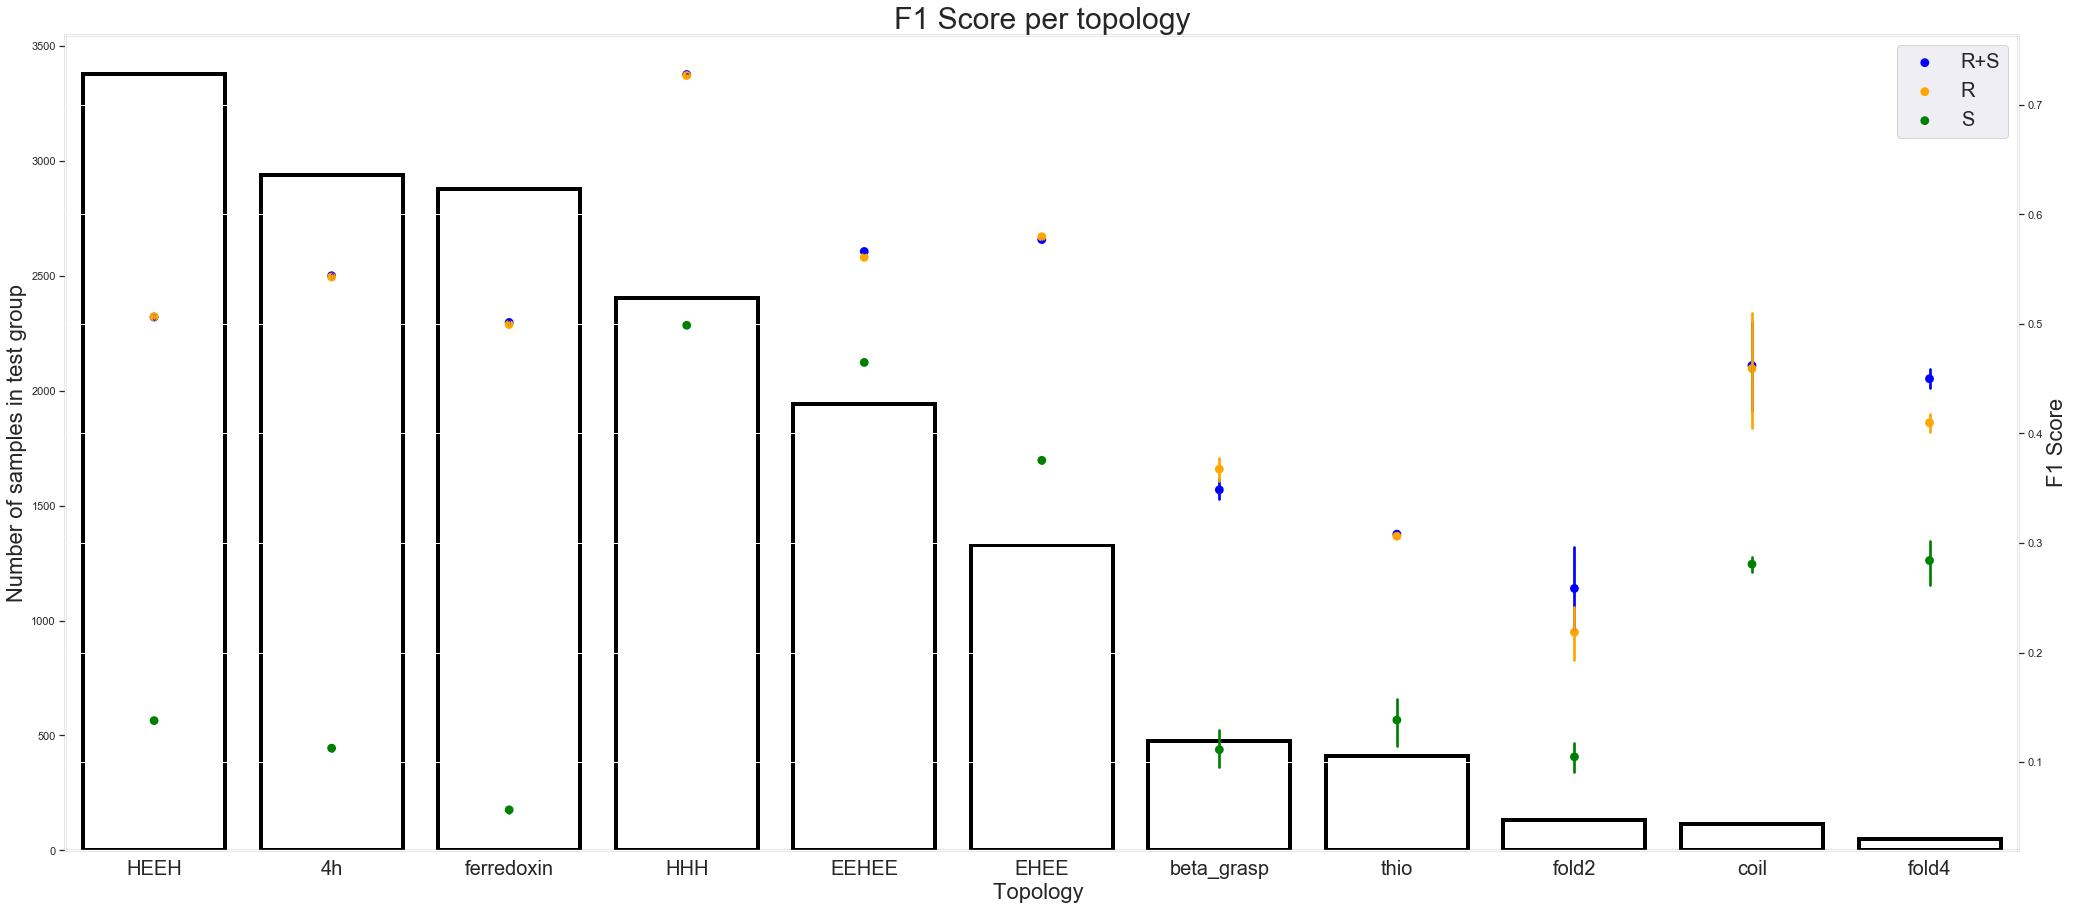

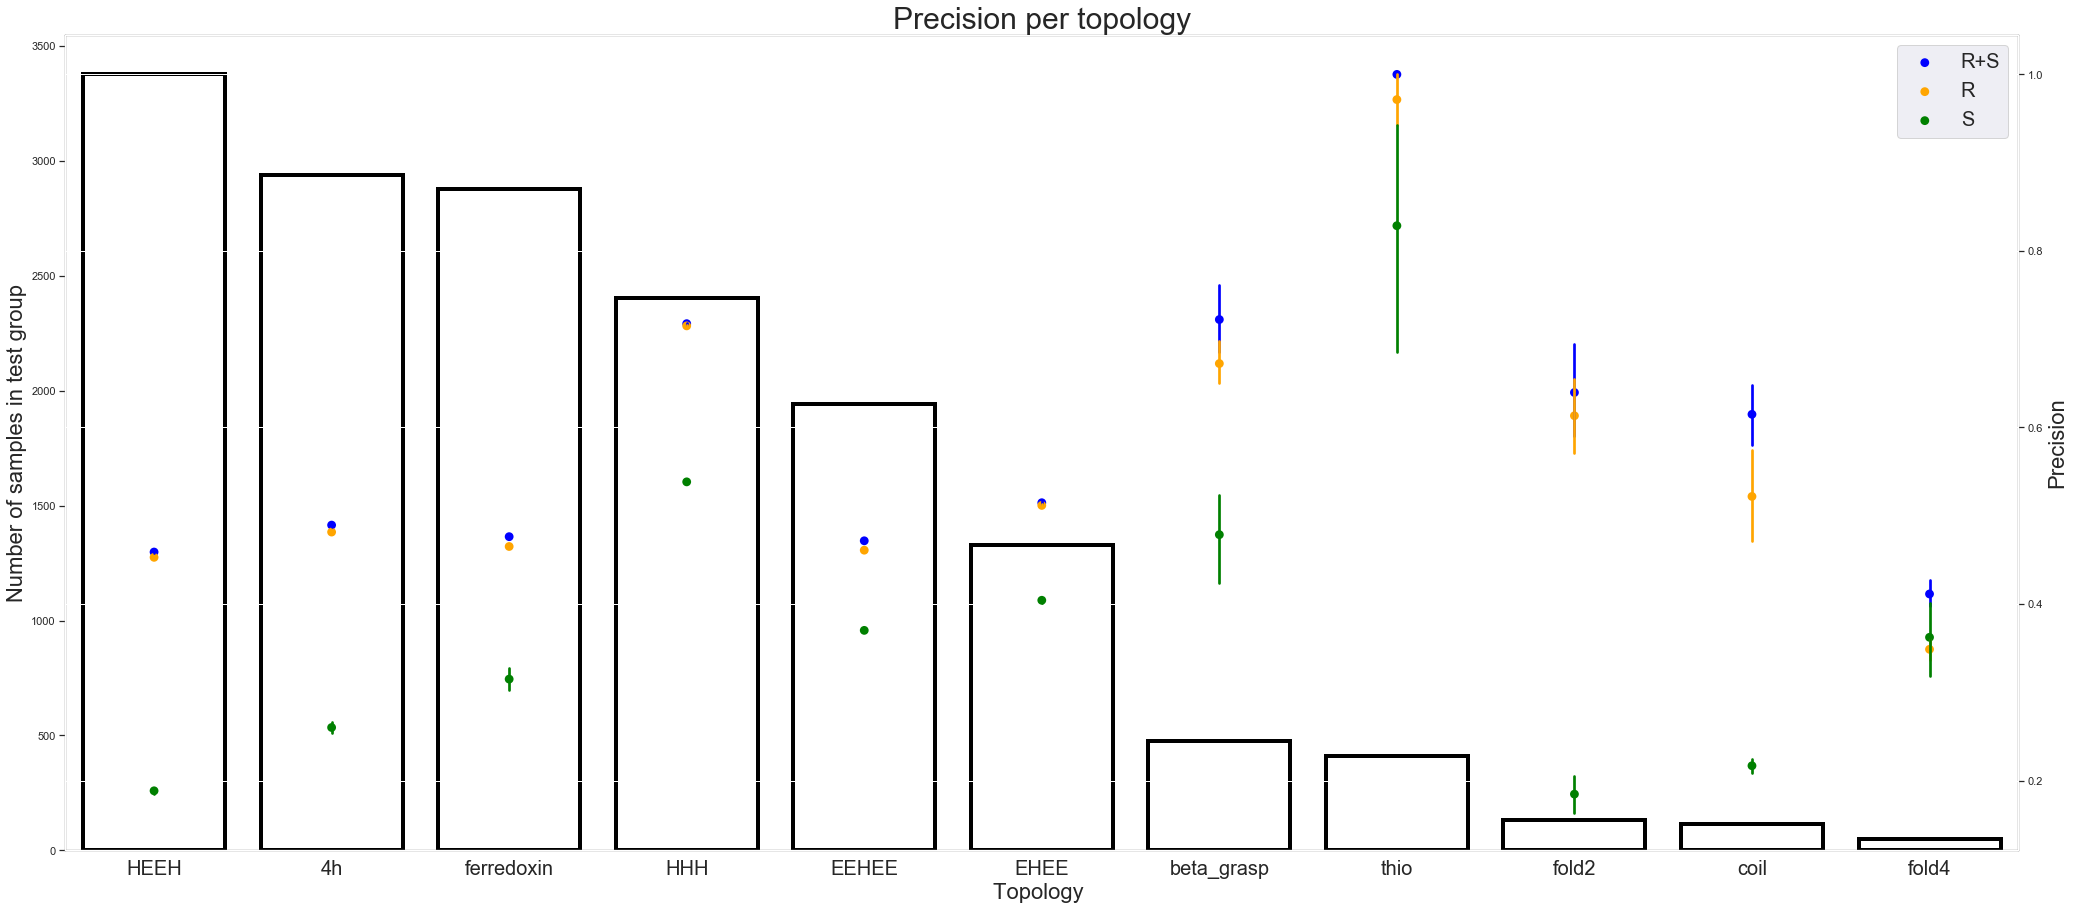

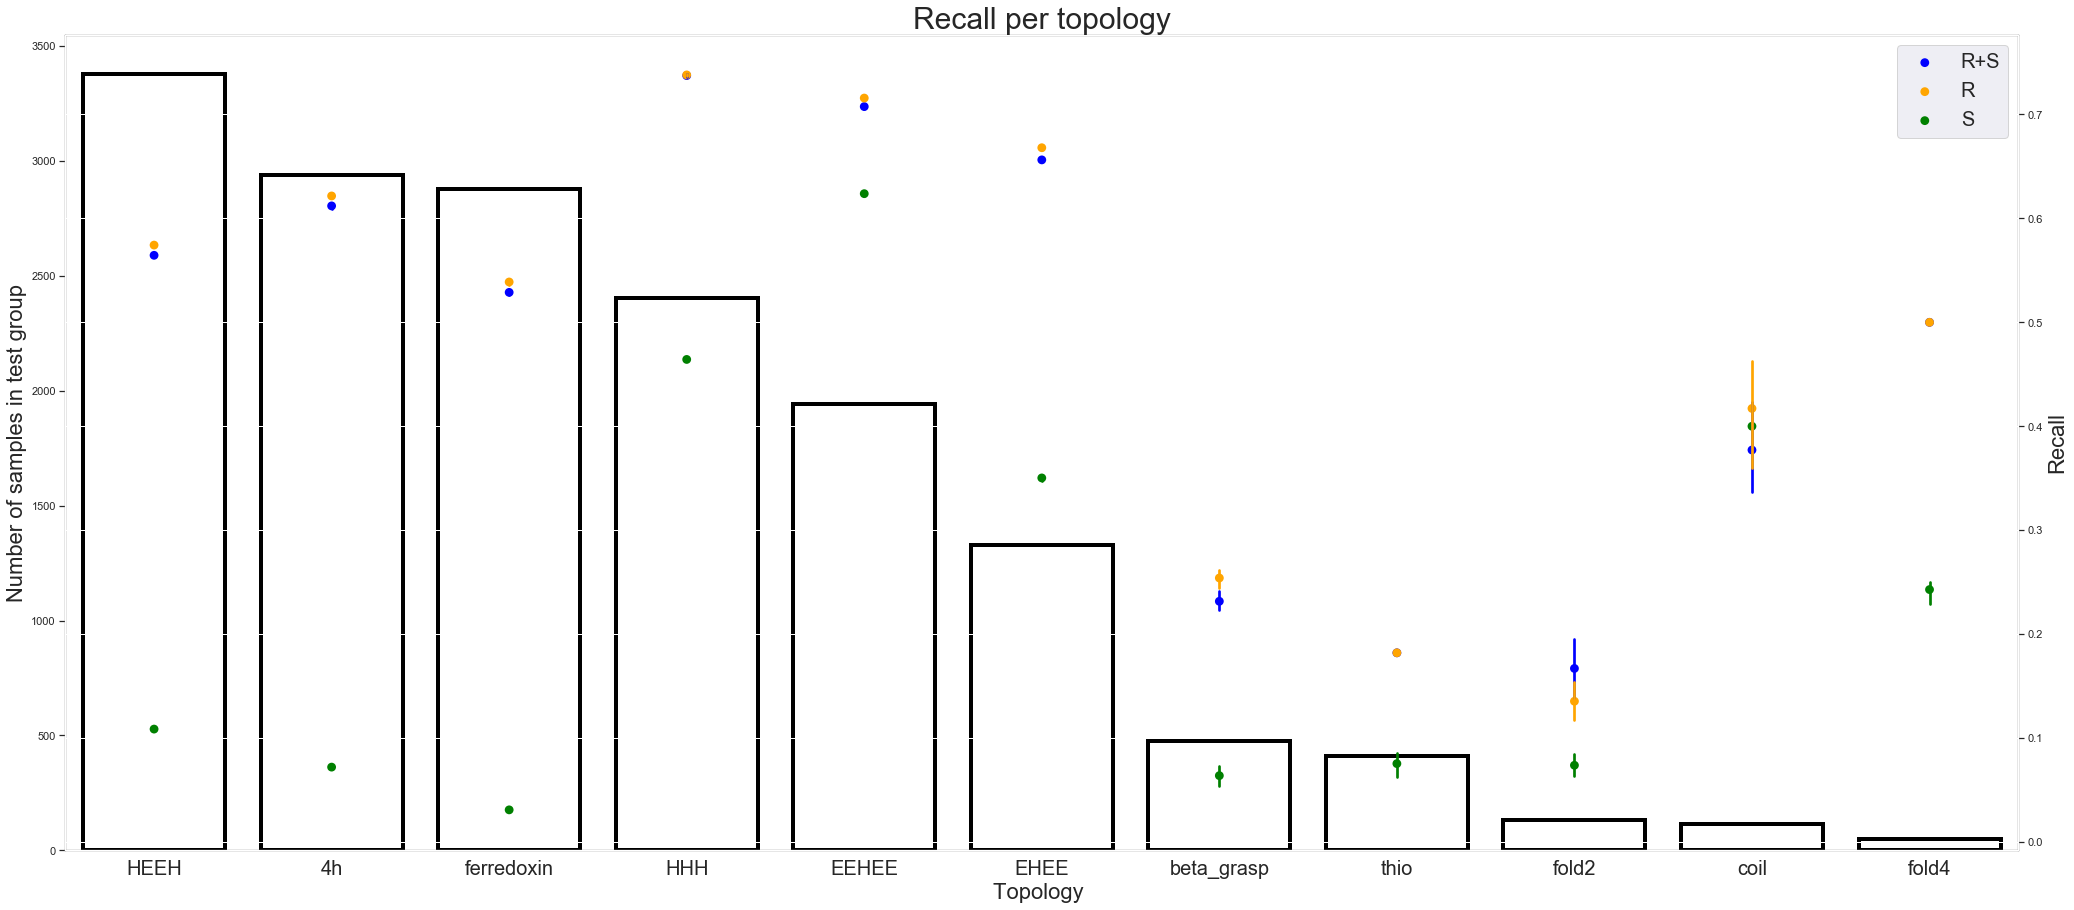

In [12]:
overall_results(
    file_path="./data/topology_specified_classification_leaderboard.html",
    loo_run=False,
    topology_run=True,
    general_run=False,
    model_description_column='Data and Split Description',
    metric='clf'
               )

### Regressor Results

EHEE          303
EEHEE         303
HHH           303
4h            303
thio          303
HEEH          303
ferredoxin    303
fold4         300
fold2         300
beta_grasp    300
coil          300
Name: topology, dtype: int64
Plotting Trends:


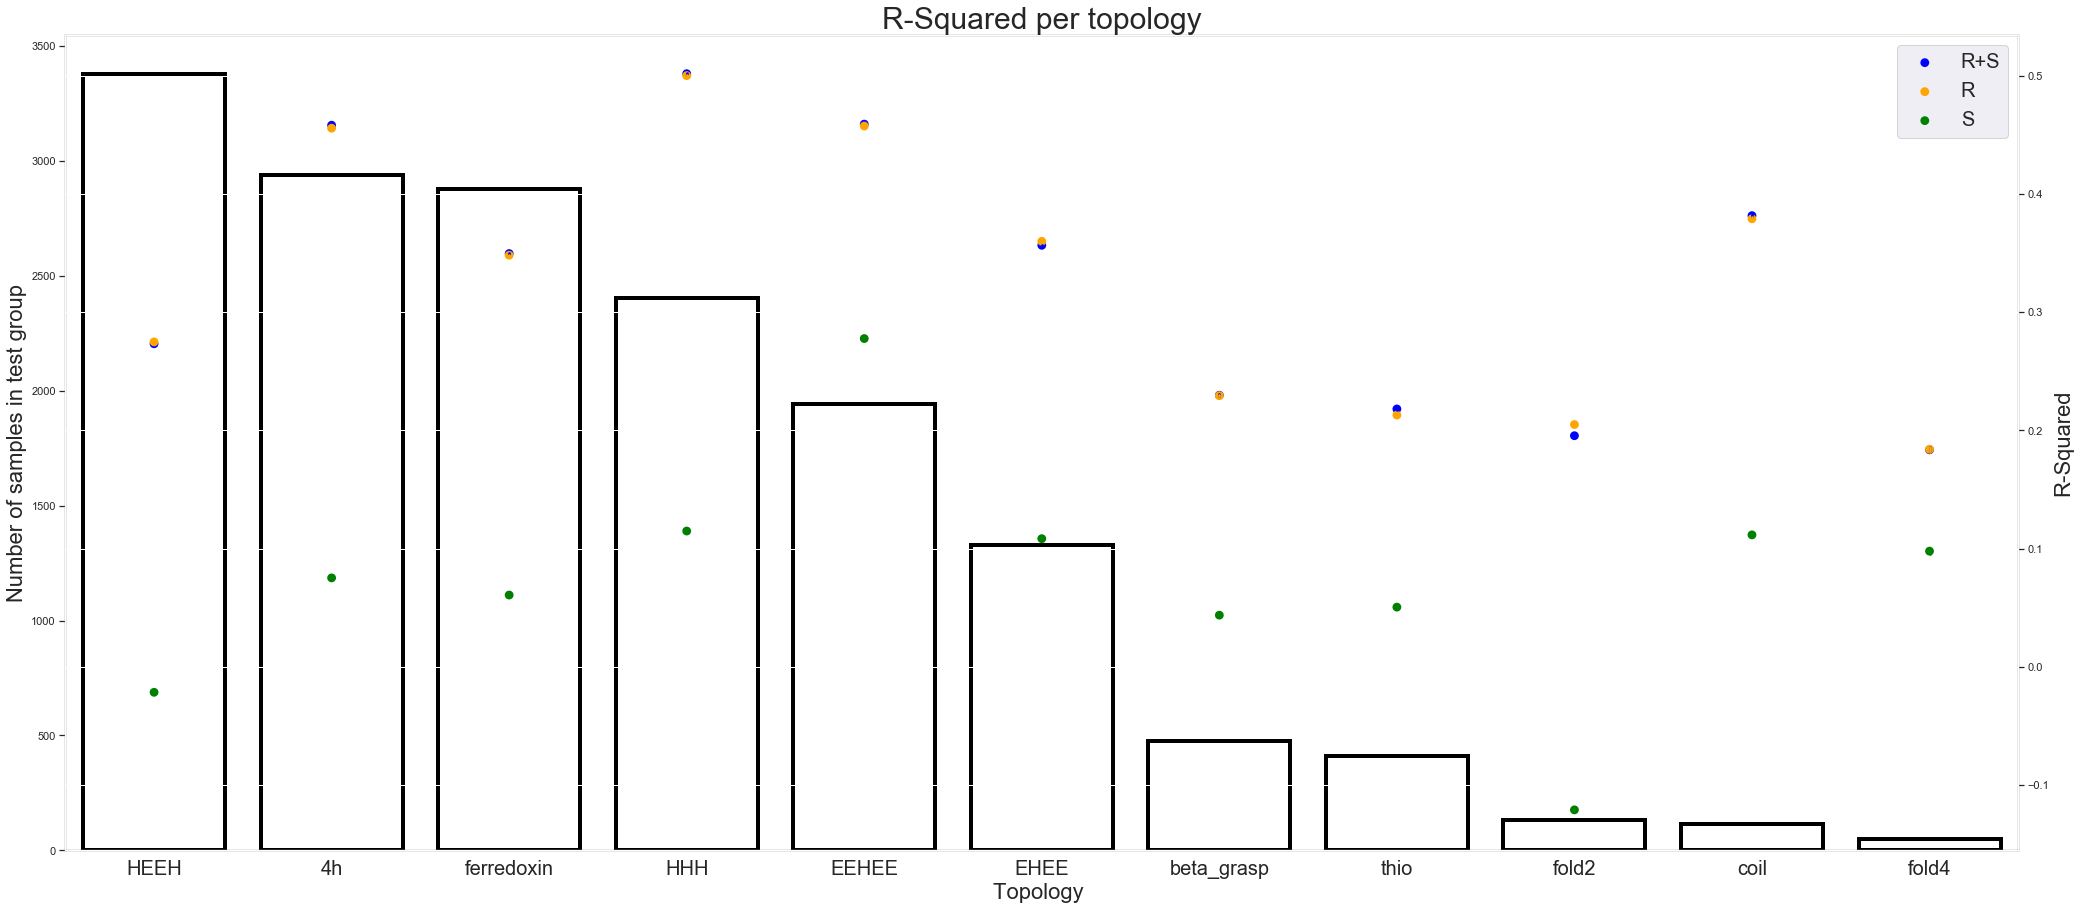

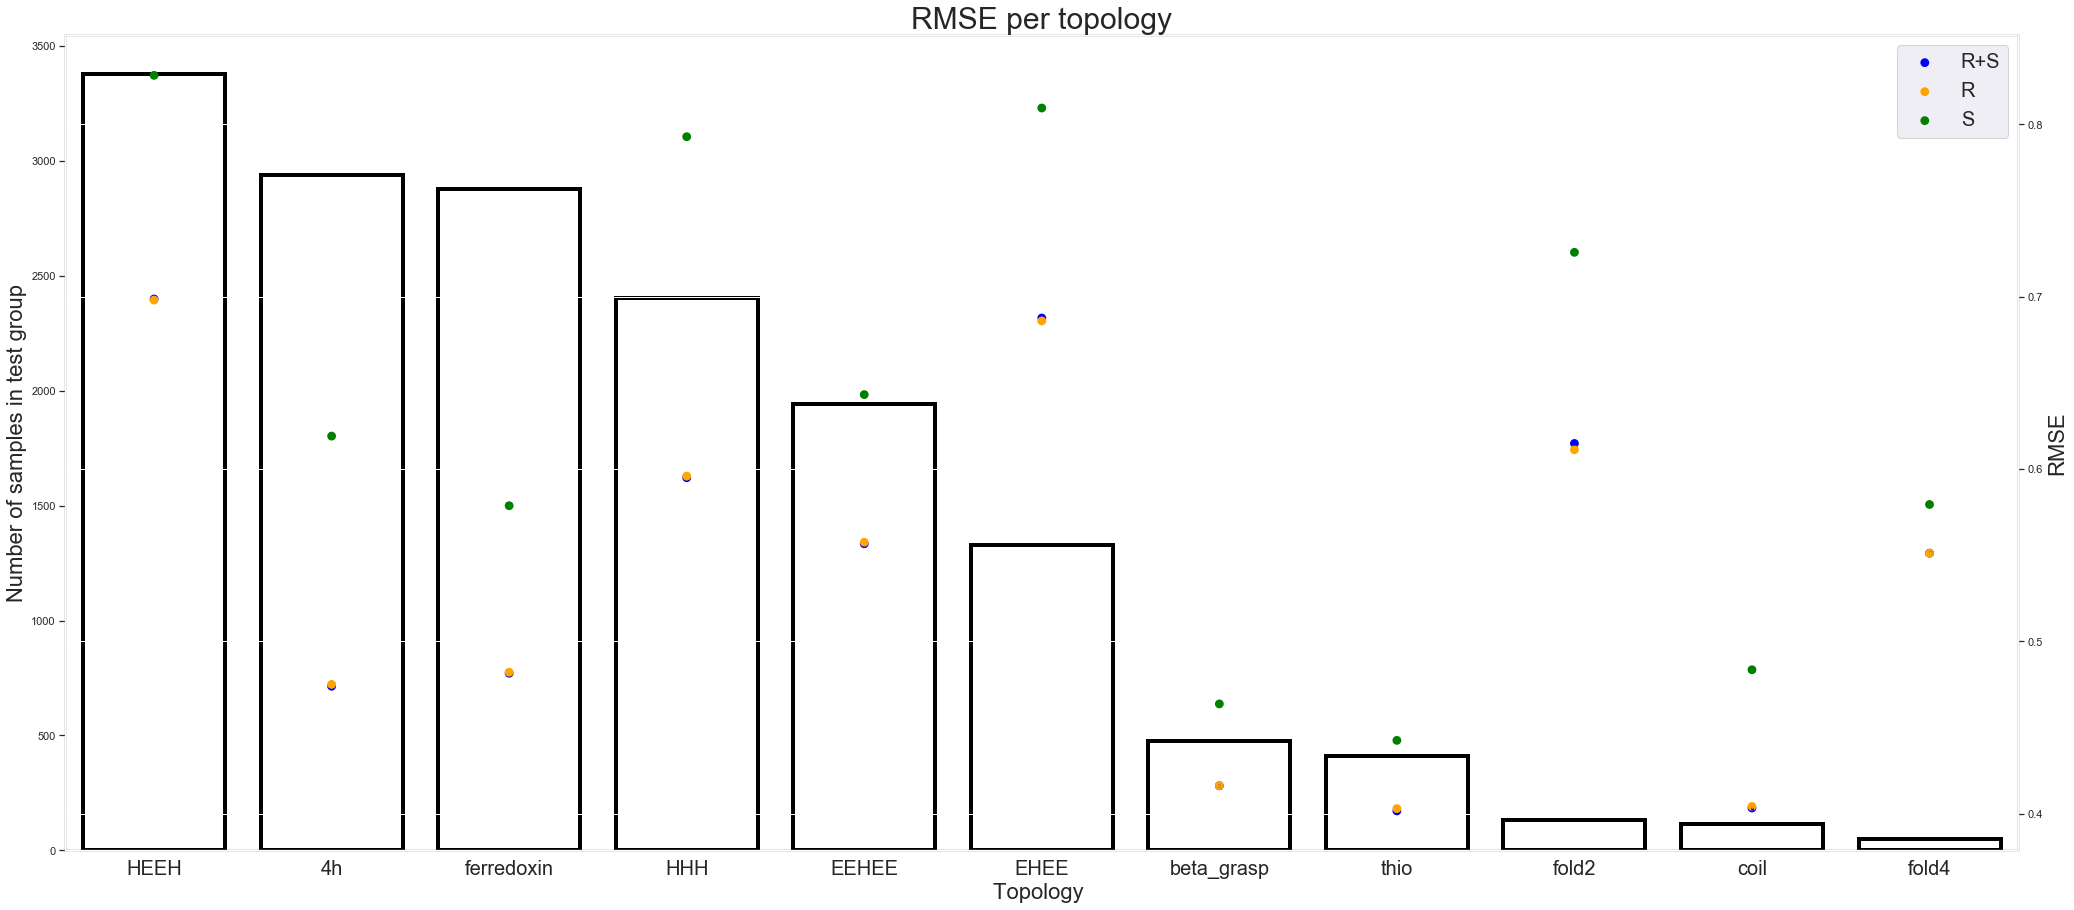

In [13]:
overall_results(
    file_path="./data/topology_specified_regression_leaderboard.html",
    loo_run=False,
    topology_run=True,
    general_run=False,
    model_description_column='Data and Split Description',
    metric='rgr')

------------

# Model Audits

--------------------

**TODO**:
- explain the reasoning for model audits
- explain what SHAP measures
- explain what BBA measures

## SHAP
* genModel == Random Forest model which included all topologies in training and testing

### Generalized Models

In [2]:
#load names for entropy and rosetta features
ros_features = pd.read_csv('./data/rosetta_features.csv')["0"].to_list()
spc_features = pd.read_csv('./data/entropy_features.csv')["0"].to_list()

genModel_clf_shap = pd.read_csv('./data/model_audits/SHAP_genModel_clf_feature_importances.csv')
genModel_clf_shap['is_rosetta'] = genModel_clf_shap["Feature"].isin(ros_features)

genModel_rgr_shap = pd.read_csv('./data/model_audits/SHAP_genModel_rgr_feature_importances.csv')
genModel_rgr_shap['is_rosetta'] = genModel_rgr_shap["Feature"].isin(ros_features)


In [3]:
#classifier model results
genModel_clf_shap[genModel_clf_shap['is_rosetta']==False]

,Feature,Importance,is_rosetta
58,Mean_L_entropy,0.001489,False
68,H_range_entropy,0.001100,False
69,E_min_entropy,0.001099,False
80,SumL_entropies,0.000886,False
81,L_min_entropy,0.000859,False
82,E_range_entropy,0.000857,False
84,E_max_entropy,0.000843,False
85,Mean_H_entropy,0.000777,False
89,H_max_entropy,0.000707,False
90,SumE_entropies,0.000701,False


In [4]:
#regressor model results
genModel_rgr_shap[genModel_rgr_shap['is_rosetta']==False]

,Feature,Importance,is_rosetta
49,Mean_L_entropy,0.002234,False
66,H_max_entropy,0.001493,False
68,L_min_entropy,0.001476,False
71,H_range_entropy,0.001408,False
74,L_max_entropy,0.001325,False
79,Mean_E_entropy,0.001177,False
81,Mean_H_entropy,0.001158,False
83,SumH_entropies,0.001124,False
85,L_range_entropy,0.001083,False
86,Mean_res_entropy,0.001069,False


### Topology Specific Models

In [5]:
shap_4h_clf = pd.read_csv('./data/model_audits/SHAP_4h_clf_feature_importances.csv')
shap_betag_clf = pd.read_csv('./data/model_audits/SHAP_beta_grasp_clf_feature_importances.csv')
shap_coil_clf = pd.read_csv('./data/model_audits/SHAP_coil_clf_feature_importances.csv')
shap_EEHEE_clf = pd.read_csv('./data/model_audits/SHAP_EEHEE_clf_feature_importances.csv')
shap_EHEE_clf = pd.read_csv('./data/model_audits/SHAP_EHEE_clf_feature_importances.csv')
shap_ferr_clf = pd.read_csv('./data/model_audits/SHAP_ferredoxin_clf_feature_importances.csv')
shap_fold2_clf = pd.read_csv('./data/model_audits/SHAP_fold2_clf_feature_importances.csv')
shap_fold4_clf = pd.read_csv('./data/model_audits/SHAP_fold4_clf_feature_importances.csv')
shap_HEEH_clf = pd.read_csv('./data/model_audits/SHAP_HEEH_clf_feature_importances.csv')
shap_HHH_clf = pd.read_csv('./data/model_audits/SHAP_HHH_clf_feature_importances.csv')
shap_thio_clf = pd.read_csv('./data/model_audits/SHAP_thio_clf_feature_importances.csv')

shap_df_list = [
    shap_4h_clf,shap_betag_clf,shap_coil_clf,shap_EEHEE_clf,
    shap_EHEE_clf,shap_ferr_clf,shap_fold2_clf,shap_fold4_clf,
    shap_HEEH_clf,shap_HHH_clf,shap_thio_clf
]
shap_df_list_names = ['4h','beta_grasp','coil','EEHEE','EHEE','ferredoxin','fold2','fold4','HEEH','HHH','thio']

In [6]:
print(spc_features)

['S_PC', 'Mean_H_entropy', 'Mean_L_entropy', 'Mean_E_entropy', 'Mean_res_entropy', 'SumH_entropies', 'SumL_entropies', 'SumE_entropies', 'H_max_entropy', 'H_min_entropy', 'H_range_entropy', 'L_max_entropy', 'L_min_entropy', 'L_range_entropy', 'E_max_entropy', 'E_min_entropy', 'E_range_entropy']


In [8]:
from HelperFunctions.feature_visualizations import rank_features,get_count_percentiles_list
for i in range(len(shap_df_list)):
    print("Topology: %s"%shap_df_list_names[i])
    print(rank_features(shap_df_list[i],just_entropy=True))
    print("")

index = shap_df_list_names
data = []
for df in shap_df_list:
    data.append(get_count_percentiles_list(df))
    
summary_df = pd.DataFrame(data=data,index=index,columns=['35th','50th','75th','85th'])

Topology: 4h
              Feature  Importance
33      H_min_entropy    0.001692
43      L_min_entropy    0.001323
50    L_range_entropy    0.001127
54      H_max_entropy    0.000957
55     Mean_L_entropy    0.000931
56    H_range_entropy    0.000921
59   Mean_res_entropy    0.000853
62      L_max_entropy    0.000813
82     Mean_H_entropy    0.000522
83     SumH_entropies    0.000512
92     SumL_entropies    0.000403
101              S_PC    0.000302
125    Mean_E_entropy    0.000000
126    SumE_entropies    0.000000
127     E_max_entropy    0.000000
128     E_min_entropy    0.000000
129   E_range_entropy    0.000000

Topology: beta_grasp
              Feature  Importance
44      H_max_entropy    0.001352
57    L_range_entropy    0.000898
59      E_min_entropy    0.000869
60     SumL_entropies    0.000836
66     Mean_E_entropy    0.000711
67    H_range_entropy    0.000686
70      H_min_entropy    0.000582
71      L_min_entropy    0.000582
77               S_PC    0.000516
86      E_max

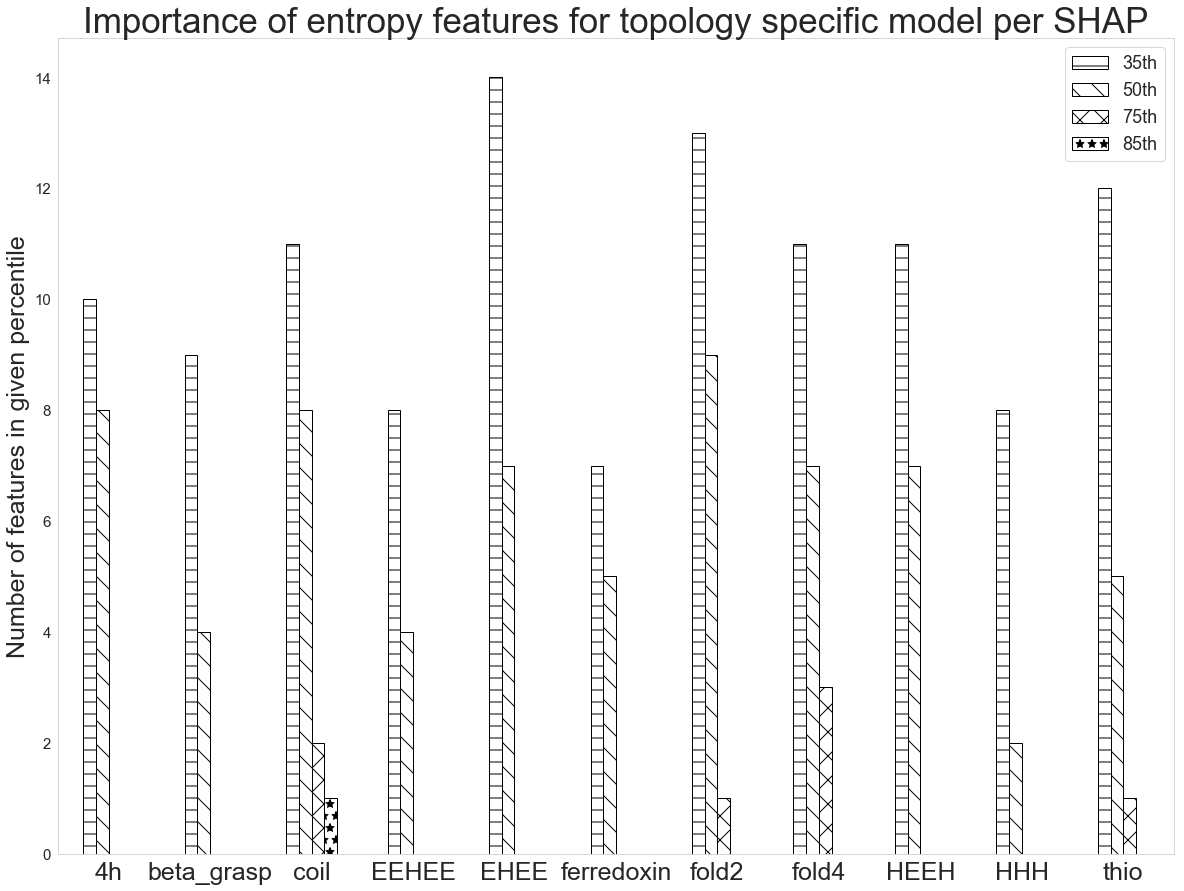

In [26]:
plt.close('all')
f, ax = plt.subplots(figsize=(20,15))

#plot the percentiles count
summary_df.plot(kind='bar',facecolor='none',edgecolor='black',ax=ax)

#label the graph
sns.set_style('whitegrid')
ax.grid(False)
plt.xticks(rotation=0,fontsize='25')
plt.yticks(fontsize='15')
plt.ylabel('Number of features in given percentile',fontsize='25')
plt.title('Importance of entropy features for topology specific model per SHAP',fontsize='35')

bars = ax.patches


# Define some hatches
hatches = ['-', '\\', 'x',"*"]

dash_bars_inx = list(range(11))
slash_bars_inx = list(range(11,22))
x_bars_inx = list(range(22,33))
asterisk_bars_inx = list(range(33,44))

inx_list = [dash_bars_inx,slash_bars_inx,x_bars_inx,asterisk_bars_inx]

#change colors in graph to hatches
for i in range(len(inx_list)):
    hatch_type = hatches[i]
    for j in inx_list[i]:
        bars[j].set_hatch(hatch_type)
        
plt.legend(fontsize='18')

plt.show()